# *Traitement du jeu de données*

## Exploration du jeu de données et compréhensions des variables 

## Generalities:
- fields that end with _t are dates in the UNIX timestamp format (number of seconds since Jan 1st 1970)
- fields that end with _datetime are dates in the iso8601 format: yyyy-mm-ddThh:mn:ssZ
- fields that end with _tags are comma separated list of tags (e.g. categories_tags is the set of normalized tags computer from the categories field)
- fields that end with a language 2 letter code (e.g. fr for French) is the set of tags in that language
- fields that end with _100g correspond to the amount of a nutriment (in g, or kJ for energy) for 100 g or 100 ml of product
- fields that end with _serving correspond to the amount of a nutriment (in g, or kJ for energy) for 1 serving of the product

## List of fields:

### general information:

- code : barcode of the product (can be EAN-13 or internal codes for some food stores), for products without a barcode, Open Food Facts assigns a number starting with the 200 reserved prefix
- url : url of the product page on Open Food Facts
- creator : contributor who first added the product
- created_t : date that the product was added (UNIX timestamp format)
- created_datetime : date that the product was added (iso8601 format: yyyy-mm-ddThh:mn:ssZ)
- last_modified_t : date that the product page was last modified
- last_modified_datetime
- product_name : name of the product
- generic_name
- quantity : quantity and unit

### tags:

- packaging : shape, material
- packaging_tags
- brands
- brands_tags
- categories
- categories_tags
- categories_fr
- origins : origins of ingredients
- origins_tags
- manufacturing_places : places where manufactured or transformed
- manufacturing_places_tags
- labels
- labels_tags
- labels_fr
- emb_codes
- emb_codes_tags
- first_packaging_code_geo : coordinates corresponding to the first packaging code indicated
- cities
- cities_tags
- purchase_places
- stores
- countries : list of countries where the product is sold
- countries_tags
- countries_fr

### ingredients:

- ingredients_text
- traces
- traces_tags

### misc. data:

- serving_size : serving size in g
- no_nutriments : indicates if the nutrition facts are indicated on the food label
- additives_n : number of food additives
- additives
- additives_tags
- ingredients_from_palm_oil_n
- ingredients_from_palm_oil
- ingredients_from_palm_oil_tags
- ingredients_that_may_be_from_palm_oil_n
- ingredients_that_may_be_from_palm_oil
- ingredients_that_may_be_from_palm_oil_tags
- nutrition_grade_fr : nutrition grade ('a' to 'e'). see https://fr.openfoodfacts.org/nutriscore
- main_category
- main_category_fr
- image_url
- image_small_url

### nutrition facts:

- energy_100g
- energy-kj_100g
- energy-kcal_100g
- proteins_100g
- casein_100g
- serum-proteins_100g
- nucleotides_100g
- carbohydrates_100g
- sugars_100g
- sucrose_100g
- glucose_100g
- fructose_100g
- lactose_100g
- maltose_100g
- maltodextrins_100g
- starch_100g
- polyols_100g
- fat_100g
- saturated-fat_100g
- butyric-acid_100g
- caproic-acid_100g
- caprylic-acid_100g
- capric-acid_100g
- lauric-acid_100g
- myristic-acid_100g
- palmitic-acid_100g
- stearic-acid_100g
- arachidic-acid_100g
- behenic-acid_100g
- lignoceric-acid_100g
- cerotic-acid_100g
- montanic-acid_100g
- melissic-acid_100g
- monounsaturated-fat_100g
- polyunsaturated-fat_100g
- omega-3-fat_100g
- alpha-linolenic-acid_100g
- eicosapentaenoic-acid_100g
- docosahexaenoic-acid_100g
- omega-6-fat_100g
- linoleic-acid_100g
- arachidonic-acid_100g
- gamma-linolenic-acid_100g
- dihomo-gamma-linolenic-acid_100g
- omega-9-fat_100g
- oleic-acid_100g
- elaidic-acid_100g
- gondoic-acid_100g
- mead-acid_100g
- erucic-acid_100g
- nervonic-acid_100g
- trans-fat_100g
- cholesterol_100g
- fiber_100g
- sodium_100g
- alcohol_100g : % vol of alcohol
- vitamin-a_100g
- vitamin-d_100g
- vitamin-e_100g
- vitamin-k_100g
- vitamin-c_100g
- vitamin-b1_100g
- vitamin-b2_100g
- vitamin-pp_100g
- vitamin-b6_100g
- vitamin-b9_100g
- vitamin-b12_100g
- biotin_100g: also known as Vitamine B8
- pantothenic-acid_100g: also known as Vitamine B5
- silica_100g
- bicarbonate_100g
- potassium_100g
- chloride_100g
- calcium_100g
- phosphorus_100g
- iron_100g
- magnesium_100g
- zinc_100g
- copper_100g
- manganese_100g
- fluoride_100g
- selenium_100g
- chromium_100g
- molybdenum_100g
- iodine_100g
- caffeine_100g
- taurine_100g
- ph_100g : pH (no unit)
- fruits-vegetables-nuts_100g : % of fruits, vegetables and nuts (excluding potatoes, yams, manioc)

- carbon-footprint_100g : carbon footprint (as indicated on the packaging of some products)
- nutrition-score-fr_100g : Nutri-Score - Nutrition score derived from the UK FSA score and adapted for the French market (formula defined by the team of Professor Hercberg)
- nutrition-score-uk_100g : nutrition score defined by the UK Food Standards Administration (FSA)

### Variable la plus importante :
**Le nutriscore** : Repere graphique qui classe chaque produit selon un score qui prend en compte la teneur en nutriments et aliments à favoriser et ceux à limiter. 
Son calcul consiste à faire la différence, pour 100 grammes de produit, entre les composantes négatives (sucres, sel, acides gras saturés...) et positives (vitamines, fibres, protéines,...) d'un aliment et permet d’attribuer une note. Celle-ci est alors transcrite sur une échelle de 5 couleurs (du vert foncé au orange foncé), associées à des lettres allant de A (« meilleure qualité nutritionnelle ») à E (« moins bonne qualité nutritionnelle »)

In [1]:
import numpy as np 
import pandas as pd
#pd.set_option("max_colwidth", None)
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#The file encoding is Unicode UTF-8. The character that separates fields is <tab> (tabulation).
df = pd.read_csv('fr.openfoodfacts.org.products.csv', sep = '\t', encoding = 'utf-8')

### Fonctions que l'on va utiliser pour l'étude des valeurs manquantes des jeux de données

In [3]:
'''Fonction qui retourne un tableau contenant le nom de la variable, le nombre de valeur manquante ainsi que le 
pourcentage de valeurs manquantes associé '''

def missingValues(df):
    df_null = pd.DataFrame({'Count' : df.isnull().sum(), 'Percentage': round(100*df.isnull().sum()/len(df),2)})
    #df_null_pos = df_null[df_null['Count'] > 0 ]
    df_null_sorted = df_null.sort_values(by=['Percentage'], ascending = False)
    df_null_sorted = pd.DataFrame(df_null_sorted)
    df_null_sorted.reset_index(inplace = True)
    df_null_sorted.rename(columns={'index':'Variable Name'}, inplace=True)
    return df_null_sorted

'''Cette fonction permet d'indiquer le taux de remplissage moyen d'un dataframe indiqué en paramètre'''
def tauxDeReplissageMoyen(df):
    print(round((df.notna().mean().mean())*100,2))

'''Cette fonction retourne la Heatmap des valeurs manquantes du dataframe indiqué en paramètre'''
def heatmapMissingValues(df):
    f,ax = plt.subplots(figsize=(25, 25))
    sns.heatmap(df.isnull(), cbar=False, ax=ax)    

'''Cette fonction permet de supprimer les variables avec un pourcentage de valeur manquante supérieur à la limite'''
def dropColumns(df, limit):
    tab = missingValues(df)
    columns_to_keep = list()

    for row in tab.iterrows():        
        if float(row[1]['Percentage']) < float(limit):
            columns_to_keep.append(row[1]['Variable Name'])
            
    data = df[columns_to_keep]
    return data

'''Cette fonction donne des informations pour aider à décider quelle feature on doit conserver, dans le cas où
on a 2 features qui semblent correspondre à la même chose

Elle nous donne :
- le pourcentage de cas où la valeur de la colonne 1 est renseignée, mais pas la 2
- le pourcentage de cas où la valeur de la colonne 2 est renseignée, mais pas la 1
- le pourcentage de cas où les valeurs de la colonne 1 et 2 sont renseignées toutes les deux'''

def compare_NaN(df, col1, col2):
    num_rows, num_cols = df.shape
    col1notna_col2na = round((((df[(df[col1].notna()) & (df[col2].isna())][[col1,col2]].shape[0]) / num_rows)*100),5)
    col2notna_col1na = round((((df[(df[col2].notna()) & (df[col1].isna())][[col1,col2]].shape[0]) / num_rows)*100),5)
    col1notna_col2notna = round((((df[(df[col1].notna()) & (df[col2].notna())][[col1,col2]].shape[0]) / num_rows)*100),5)

    print(f'Cas où {col1} est renseigné mais pas {col2} : {col1notna_col2na}%')
    print(f'Cas où {col2} est renseigné mais pas {col1} : {col2notna_col1na}%')
    print(f'Cas où {col1} et {col2} sont renseignés tous les deux : {col1notna_col2notna}%')


In [4]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ] [ vegetable-oil -

In [5]:
df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 162 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    code                                        object 
 1    url                                         object 
 2    creator                                     object 
 3    created_t                                   object 
 4    created_datetime                            object 
 5    last_modified_t                             object 
 6    last_modified_datetime                      object 
 7    product_name                                object 
 8    generic_name                                object 
 9    quantity                                    object 
 10   packaging                                   object 
 11   packaging_tags                              object 
 12   brands                                      object 
 13   brands_tags 

In [7]:
print("Nombre de lignes dans le dataset : {}".format(df.shape[0]))
print("Nombre de colonnes dans le dataset : {}".format(df.shape[1]))

Nombre de lignes dans le dataset : 320772
Nombre de colonnes dans le dataset : 162


In [8]:
#on verifie si il y a des doublons
df.duplicated().sum()
#pas de doublons

0

In [9]:
#On regarde les valeurs manquantes
missingValues(df)
#on peut voir qu'il y a beaucoup de variables avec un pourcentage de valeurs manquantes proche ou egal à 100

,Variable Name,Count,Percentage
0,water-hardness_100g,320772,100.00
1,caproic-acid_100g,320772,100.00
2,ingredients_from_palm_oil,320772,100.00
3,ingredients_that_may_be_from_palm_oil,320772,100.00
4,nutrition_grade_uk,320772,100.00
5,maltodextrins_100g,320761,100.00
6,maltose_100g,320768,100.00
7,nervonic-acid_100g,320772,100.00
8,erucic-acid_100g,320772,100.00
9,mead-acid_100g,320772,100.00


## Idée d'application
### Proposer un produit de nutriscore A ou B a la place d'un produit avec un nutriscore D ou E : tout en gardant la même catégorie et avec le même apport en nutriment que le produit demandé 

## Filtrage du jeu de données 
On se concentre sur les seules variables indispensable à la mise en oeuvre de l'application

In [10]:
#on va déjà supprimer les variables ayant 100% de valeurs manquantes
df = dropColumns(df, 100)

In [11]:
df.shape
#on passe de 162 à 131 variables 

(320772, 131)

In [12]:
df.columns

Index(['glucose_100g', 'beta-carotene_100g', 'eicosapentaenoic-acid_100g',
       'omega-9-fat_100g', 'behenic-acid_100g', 'arachidic-acid_100g',
       'taurine_100g', 'chromium_100g', 'fructose_100g', 'casein_100g',
       ...
       'url', 'states', 'states_tags', 'states_fr', 'code',
       'last_modified_datetime', 'last_modified_t', 'created_datetime',
       'created_t', 'creator'],
      dtype='object', length=131)

### On choisit de garder que les produits vendus en France
L'application serait de proposer un produit de même catégorie avec meilleur nutriscore donc autant se concentrer sur la France pour eviter d'avoir des produits vendus dans d'autre pays comme proposition

In [13]:
#on va selectionner que la France
#countries : list of countries where the product is sold
df['countries_fr'].value_counts()

États-Unis                                                                                                                                                                                                             172998
France                                                                                                                                                                                                                  94392
Suisse                                                                                                                                                                                                                  14953
Allemagne                                                                                                                                                                                                                7870
Espagne                                                                                                         

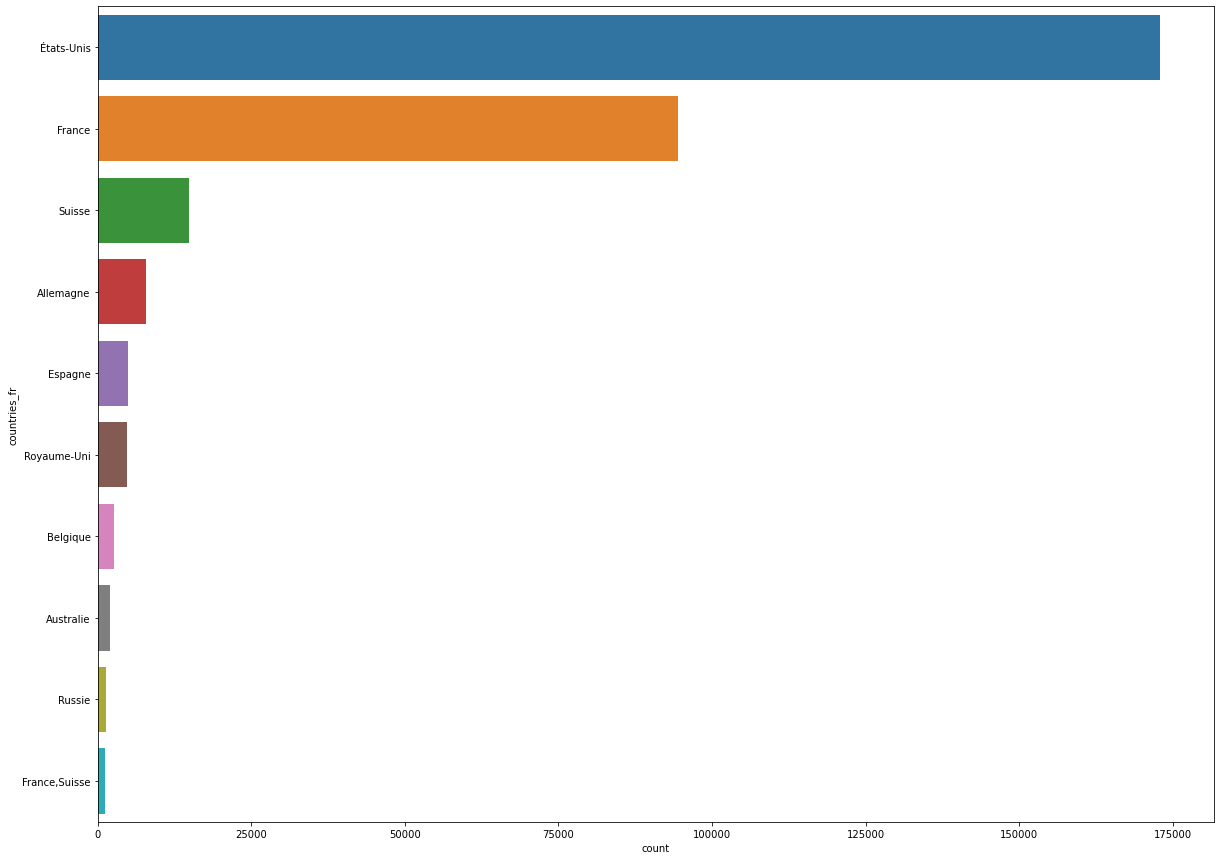

In [14]:
#on fait un countplot des differents pays pour voir la repartition des produits
plt.figure(figsize=(20, 15))
data_order = df['countries_fr'].value_counts().index[0:10]
sns.countplot(y="countries_fr", order=data_order, data=df);

In [15]:
#on se demande quelle variable garder entre coutries_fr, coutries_tags et coutries 
print('taille de countries_fr contenant la france:',len(df[df['countries_fr'].str.contains('France') == True]))
print('taille de countries_tags contenant la france:',len(df[df['countries_tags'].str.contains('france') == True]))
print('taille de countries contenant la france:',len(df[df['countries'].str.contains("France|FR|France")==True]))
#on choisit coutries_fr pour selectionner la france car il y a plus de lignes

taille de countries_fr contenant la france: 98440
taille de countries_tags contenant la france: 98440
taille de countries contenant la france: 97548


In [16]:
#on va donc supprimer tous les autres pays que la France
dff = df[df['countries_fr'].str.contains("France")==True].copy()
dff.shape
#On passe de 320 772 à 98 440

(98440, 131)

In [17]:
missingValues(dff)

,Variable Name,Count,Percentage
0,folates_100g,98438,100.00
1,cities,98440,100.00
2,behenic-acid_100g,98440,100.00
3,arachidic-acid_100g,98439,100.00
4,allergens_fr,98440,100.00
5,gamma-linolenic-acid_100g,98439,100.00
6,dihomo-gamma-linolenic-acid_100g,98440,100.00
7,glucose_100g,98434,99.99
8,beta-carotene_100g,98429,99.99
9,sucrose_100g,98427,99.99


In [18]:
#on va supprimer les variables ayant plus de 70% de valeurs manquantes
dff = dropColumns(dff, 70)

In [19]:
dff.shape
#il nous reste plus que 53 colonnes

(98440, 53)

In [20]:
dff.columns

Index(['additives_fr', 'additives_tags', 'labels', 'labels_tags', 'labels_fr',
       'stores', 'generic_name', 'purchase_places', 'fiber_100g',
       'carbohydrates_100g', 'fat_100g', 'image_url', 'image_small_url',
       'additives', 'ingredients_text', 'additives_n',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'packaging_tags',
       'packaging', 'nutrition_grade_fr', 'nutrition-score-uk_100g',
       'nutrition-score-fr_100g', 'categories_fr', 'categories_tags',
       'categories', 'main_category', 'main_category_fr', 'saturated-fat_100g',
       'sugars_100g', 'sodium_100g', 'salt_100g', 'proteins_100g',
       'energy_100g', 'pnns_groups_1', 'pnns_groups_2', 'quantity',
       'brands_tags', 'brands', 'product_name', 'countries_tags', 'countries',
       'countries_fr', 'url', 'states', 'states_tags', 'states_fr', 'code',
       'last_modified_datetime', 'last_modified_t', 'created_datetime',
       'created_t', 'creator'],
      dt

## On supprime les variables inutiles à l'étude

### Variables Countries : countries_fr, countries et countries_tags

In [21]:
dff[['countries_fr', 'countries','countries_tags']].head(100)

,countries_fr,countries,countries_tags
0,France,en:FR,en:france
46,France,France,en:france
48,France,en:FR,en:france
106,"France,États-Unis","France, US","en:france,en:united-states"
136,France,France,en:france
138,"France,États-Unis","France, US","en:france,en:united-states"
182,France,France,en:france
183,France,France,en:france
184,France,France,en:france
187,France,France,en:france


On va garder countries_fr qui est plus lisible

### Variables pnns_groups_1 et pnns_groups_2

In [22]:
dff[['pnns_groups_1', 'pnns_groups_2']].head(100)

,pnns_groups_1,pnns_groups_2
0,NaN,NaN
46,unknown,unknown
48,NaN,NaN
106,unknown,unknown
136,unknown,unknown
138,unknown,unknown
182,Cereals and potatoes,Legumes
183,unknown,unknown
184,Sugary snacks,Biscuits and cakes
187,Sugary snacks,Sweets


In [23]:
compare_NaN(dff,'pnns_groups_1', 'pnns_groups_2')

Cas où pnns_groups_1 est renseigné mais pas pnns_groups_2 : 0.0%
Cas où pnns_groups_2 est renseigné mais pas pnns_groups_1 : 2.19118%
Cas où pnns_groups_1 et pnns_groups_2 sont renseignés tous les deux : 65.90918%


On va les garder : elles correspondent à la catégorie du produit

### Variables States : states_fr,states_tags et states_fr

In [24]:
#les variables states, states_tags et states_fr ?
dff[['states', 'states_tags','states_fr']].head(100)

,states,states_tags,states_fr
0,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com..."
46,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com..."
48,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com..."
106,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
136,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com..."
138,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
182,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com..."
183,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com..."
184,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle..."
187,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com..."


On va garder states_fr

### Variables brands_tags et brands 

In [25]:
#On va supprimer brands_tag et garder brands : plus lisible 
dff[['brands', 'brands_tags']].head(100)

,brands,brands_tags
0,Ferme t'y R'nao,ferme-t-y-r-nao
46,NaN,NaN
48,NaN,NaN
106,Sunridge,sunridge
136,NaN,NaN
138,"Twix, Lundberg","twix,lundberg"
182,Bertrand Lejeune,bertrand-lejeune
183,A&W,a-w
184,St Michel,st-michel
187,NaN,NaN


### Variables additives, additives_tags, additives_n, additives_fr et  ingredients_text

In [26]:
#On regarde la correlation entre additives et ingredients_text : on dirait que c'est les mêmes variables
df2 = dff[['additives','ingredients_text']]
df2.assign(additives = df2.additives.astype('category').cat.codes, ingredients_text = df2.ingredients_text.astype('category').cat.codes).corr()

,additives,ingredients_text
additives,1.00000,0.84178
ingredients_text,0.84178,1.00000


In [27]:
dff[['ingredients_text','additives', 'additives_tags', 'additives_n', 'additives_fr']].head(100)

,ingredients_text,additives,additives_tags,additives_n,additives_fr
0,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
106,"Milk chocolate coating (evaporated cane juice,...",[ milk-chocolate-coating -> en:milk-chocolate...,en:e322,1.0,E322 - Lécithines
136,NaN,NaN,NaN,NaN,NaN
138,NaN,NaN,NaN,NaN,NaN
182,lentilles vertes,[ lentilles-vertes -> fr:lentilles-vertes ] ...,NaN,0.0,NaN
183,NaN,NaN,NaN,NaN,NaN
184,"Sucre, farine de _Blé_, graisse et huiles végé...",[ sucre -> fr:sucre ] [ farine-de-ble -> fr...,"en:e1400,en:e322,en:e503",3.0,"E1400 - Dextrines,E322 - Lécithines,E503 - Car..."
187,NaN,NaN,NaN,NaN,NaN


On va garder additives_fr qui est plus parlant, et ingredients_text

### Les variables nutrition_grade_fr, nutrition-score-uk_100g et nutrition-score-fr_100g

In [28]:
#On regarde la différence entre nutrition_grade_fr, nutrition-score-fr_100g et nutrition-score-uk_100g
dff.nutrition_grade_fr.unique()

array([nan, 'e', 'd', 'c', 'a', 'b'], dtype=object)

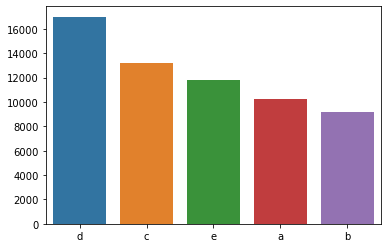

In [29]:
#on regarde la répartition des nutriscores en fonction des produits
comptage_nutrition_grade = dff['nutrition_grade_fr'].value_counts()
sns.barplot(x=comptage_nutrition_grade.index, y=comptage_nutrition_grade.values);

In [30]:
#On regarde si il y a une difference entre les deux variables
dff[['nutrition-score-fr_100g', 'nutrition-score-uk_100g']].head(100)

,nutrition-score-fr_100g,nutrition-score-uk_100g
0,NaN,NaN
46,NaN,NaN
48,NaN,NaN
106,22.0,22.0
136,NaN,NaN
138,NaN,NaN
182,NaN,NaN
183,NaN,NaN
184,NaN,NaN
187,NaN,NaN


In [31]:
#on vérifie si il y a une des deux valeurs plus rempli que l'autre
compare_NaN(dff,'nutrition-score-fr_100g', 'nutrition-score-uk_100g')
#il n'y a pas une valeur plus rempli

Cas où nutrition-score-fr_100g est renseigné mais pas nutrition-score-uk_100g : 0.0%
Cas où nutrition-score-uk_100g est renseigné mais pas nutrition-score-fr_100g : 0.0%
Cas où nutrition-score-fr_100g et nutrition-score-uk_100g sont renseignés tous les deux : 62.38826%


In [32]:
#on regarde les valeurs unique de la variable 'nutrition-score-fr_100g'
dff['nutrition-score-fr_100g'].unique()

array([ nan,  22.,  14.,  13.,  15.,  12.,   6.,  26.,  18.,  20.,  -2.,
         1.,  11.,  19.,   4.,   2.,   7.,  17.,   5.,  -4.,  25.,  -3.,
         0.,  23.,   3.,  16.,   9.,  24.,  21.,   8.,  -6.,  -1.,  10.,
        -5.,  29.,  35.,  27.,  28.,  -7.,  -9.,  36.,  32., -10.,  30.,
        -8.,  33.,  40., -11.,  31., -12.,  34., -13., -14., -15.])

In [33]:
#on regarde les valeurs unique de la variable nutrition-score-uk_100g
dff['nutrition-score-uk_100g'].unique()

array([ nan,  22.,  14.,   2.,  15.,  12.,  13.,   6.,  26.,  18.,  20.,
        -2.,   1.,  11.,  19.,   4.,   7.,  17.,   5.,  -4.,  25.,  -3.,
         0.,  23.,   3.,  16.,   9.,  24.,  21.,   8.,  -6.,  -1.,  10.,
        -5.,  29.,  35.,  27.,  28.,  -7.,  -9.,  36.,  32., -10.,  -8.,
        31., -11., -12.,  34.,  30., -13.,  33., -14., -15.])

In [34]:
df_ns = dff[['nutrition-score-uk_100g','nutrition-score-fr_100g']]
df_ns.corr()
#variables très correlés entre elles et on se concentre sur la France donc 
#on va garder 'nutrition-score-fr_100g'

,nutrition-score-uk_100g,nutrition-score-fr_100g
nutrition-score-uk_100g,1.000000,0.962367
nutrition-score-fr_100g,0.962367,1.000000


Dans les reglements d'usage du nutriscore, on apprends que : 

Pour le cas général : 
- Classe A : valeurs entre Min et -1
- Classe B : Min à 2
- Classe C : 2 à 10
- Classe D : 6 à 18
- Classe E : 10 à max

Dans le cas des boissons : 
- Classe A : Eaux 
- Classe B : Min à 1
- Classe C : 2 à 5
- Classe D : 6 à 9
- Classe E : 10 à max

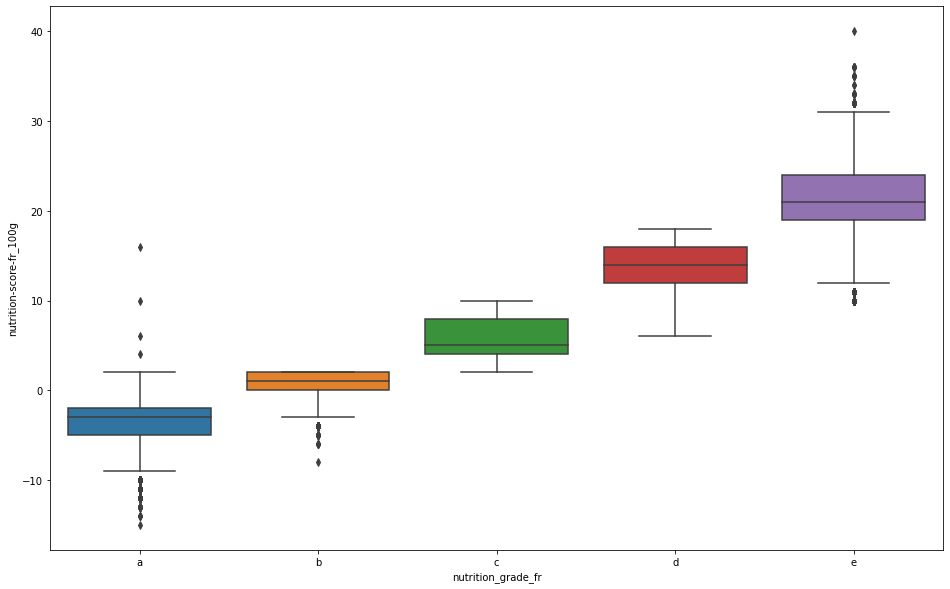

In [35]:
#on regarde le boxplot avec en abcisse la feature nutrition grade et en ordonnée la variable nutrition score fr
plt.figure(figsize=(16, 10))
sns.boxplot(x='nutrition_grade_fr', y='nutrition-score-fr_100g', data=dff.sort_values('nutrition_grade_fr'));


In [36]:
#on regarde les produits pour lesquels le nutrition score est inférieur à -1 et le nutrition grade est a 
dff[(dff['nutrition-score-fr_100g'] > -1) & (dff['nutrition_grade_fr'] == 'a')][['product_name', 'nutrition-score-fr_100g', 'nutrition_grade_fr']]

,product_name,nutrition-score-fr_100g,nutrition_grade_fr
60623,S.Pellegrino,0.0,a
176704,Eau de Source Saguaro,0.0,a
177232,Eau de source de la Doye,0.0,a
178406,Eau minérale naturelle,0.0,a
180946,Pétillante saveur Citron,1.0,a
181810,eau minérale naturelle des Vosges du nord - lé...,0.0,a
184372,Source Faustine saveur Citron-Citron Vert,0.0,a
184373,Eau de source Arcens,0.0,a
191573,Eau Volvic,0.0,a
191595,Volvic Limette,16.0,a


On voit que les nutrition score ont des valeurs très différentes pour les différentes eaux mais que le nutrition grade reste à A

On va donc garder la variable nutrition_grade_fr qui est valable pour les boissons et les aliments et supprimer nutrition-score-fr_100g 

### Les variables packaging et packaging_tags

In [37]:
dff[['packaging', 'packaging_tags']].head(100)

,packaging,packaging_tags
0,NaN,NaN
46,plastique,plastique
48,NaN,NaN
106,NaN,NaN
136,NaN,NaN
138,NaN,NaN
182,Sachet plastique,sachet-plastique
183,NaN,NaN
184,"Carton,boîte","carton,boite"
187,Carton,carton


In [38]:
df_pck = dff[['packaging','packaging_tags']]
df_pck.assign(packaging = df_pck.packaging.astype('category').cat.codes, packaging_tags = df_pck.packaging_tags.astype('category').cat.codes).corr()


,packaging,packaging_tags
packaging,1.000000,0.827463
packaging_tags,0.827463,1.000000


Variables très corrélées entre elles :on va garder packaging et supprimer packaging_tags

### Les variables main_category_fr, main_category, categories, categories_tags et categories_fr

In [39]:
dff[['main_category_fr', 'main_category', 'categories', 'categories_tags','categories_fr']].head(100)

,main_category_fr,main_category,categories,categories_tags,categories_fr
0,NaN,NaN,NaN,NaN,NaN
46,Filet-de-boeuf,fr:filet-de-boeuf,Filet de bœuf,fr:filet-de-boeuf,Filet-de-boeuf
48,NaN,NaN,NaN,NaN,NaN
106,NaN,NaN,NaN,NaN,NaN
136,NaN,NaN,NaN,NaN,NaN
138,NaN,NaN,NaN,NaN,NaN
182,Aliments et boissons à base de végétaux,en:plant-based-foods-and-beverages,"Aliments et boissons à base de végétaux,Alimen...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen..."
183,Root-bier,fr:root-bier,Root bier,fr:root-bier,Root-bier
184,Sablés,fr:sables,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés","en:sugary-snacks,en:biscuits-and-cakes,en:bisc...","Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés"
187,Bonbons,en:candies,Bonbons,"en:sugary-snacks,en:confectioneries,en:candies","Snacks sucrés,Confiseries,Bonbons"


On va supprimer 'main_category','categories_tags' et'categories et garder 'main_category_fr' et 'categories_fr' qui sont plus lisibles

### Variables sodium et sel 

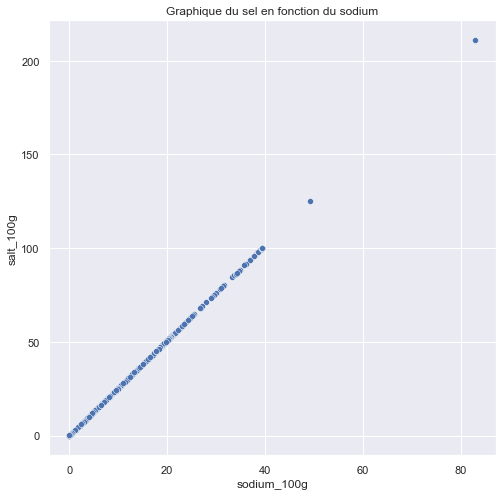

In [40]:
#On regarde les variables sel et sodium 
#les variables sont equivalentes : donc on peut en supprimer une des deux
sns.set(rc = {'figure.figsize':(8,8)})
sns.scatterplot(data=dff,x='sodium_100g',y='salt_100g').set(title='Graphique du sel en fonction du sodium');

Relation linéaire entre les deux variables

In [41]:
#On regarde le remplissage des variables en comparant les valeurs manquantes
compare_NaN(dff,'sodium_100g','salt_100g')

Cas où sodium_100g est renseigné mais pas salt_100g : 0.0%
Cas où salt_100g est renseigné mais pas sodium_100g : 0.00305%
Cas où sodium_100g et salt_100g sont renseignés tous les deux : 63.56258%


On va supprimer la variable du Sodium et garder celle du Sel qui est plus complete dans 0.00305% des cas

In [42]:
#il y a 3 valeurs où le sel est renseigné mais pas le sodium
(dff[(dff['salt_100g'].notnull()) & (dff['sodium_100g'].isna())][['sodium_100g','salt_100g']])

,sodium_100g,salt_100g
192840,NaN,0.1016
254025,NaN,0.0000
282383,NaN,0.0254


### Variables ingredients_from_palm_oil_n et ingredients_that_may_be_from_palm_oil_n

In [43]:
dff[['ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n']].head(100)

,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
0,NaN,NaN
46,NaN,NaN
48,NaN,NaN
106,0.0,0.0
136,NaN,NaN
138,NaN,NaN
182,0.0,0.0
183,NaN,NaN
184,0.0,1.0
187,NaN,NaN


In [44]:
#on compare les valeurs manquantes des deux variables
compare_NaN(dff,'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n')

Cas où ingredients_from_palm_oil_n est renseigné mais pas ingredients_that_may_be_from_palm_oil_n : 0.0%
Cas où ingredients_that_may_be_from_palm_oil_n est renseigné mais pas ingredients_from_palm_oil_n : 0.0%
Cas où ingredients_from_palm_oil_n et ingredients_that_may_be_from_palm_oil_n sont renseignés tous les deux : 54.31329%


On va supprimer la variable 'ingredients_that_may_be_from_palm_oil_n' car on suppose que la variable 'ingredients_from_palm_oil_n' est plus interessante pour notre étude

### Variables labels, labels_tags, labels_fr

In [45]:
dff[['product_name', 'labels', 'labels_fr', 'labels_tags']].head(300)

,product_name,labels,labels_fr,labels_tags
0,Farine de blé noir,NaN,NaN,NaN
46,Filet de bœuf,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN
106,Lion Peanut x2,NaN,NaN,NaN
136,Twix x2,NaN,NaN,NaN
138,Pack de 2 Twix,NaN,NaN,NaN
182,lentilles vertes,AB,"Bio,Bio européen,AB Agriculture Biologique","en:organic,en:eu-organic,fr:ab-agriculture-bio..."
183,NaN,NaN,NaN,NaN
184,Biscuits sablés fourrage au cacao,Point Vert,Point Vert,en:green-dot
187,NaN,"Sans arômes artificiels,Contient des OGM","Sans arômes artificiels,Contient-des-ogm","en:no-artificial-flavors,fr:contient-des-ogm"


On va garder labels_fr 

### Autres variables

In [46]:
dff.stores.unique()

array([nan, 'Alice Délice', 'Cora Cafétéria', ..., 'Monitoring',
       'Vente-privée.com', 'La Marande'], dtype=object)

In [47]:
dff.purchase_places.unique()

array([nan, 'Roissy,France', 'France', ..., 'Paris,Hénin-Beaumont,France',
       'Tauranga', 'France,Châtillon-sur-Chalaronne'], dtype=object)

In [48]:
dff[['product_name', 'generic_name']].head(300)

,product_name,generic_name
0,Farine de blé noir,NaN
46,Filet de bœuf,NaN
48,NaN,NaN
106,Lion Peanut x2,NaN
136,Twix x2,NaN
138,Pack de 2 Twix,NaN
182,lentilles vertes,NaN
183,NaN,NaN
184,Biscuits sablés fourrage au cacao,Biscuits sablés déclassés fourrage au cacao
187,NaN,Bonbons acidulés Raisin Fraise


In [49]:
compare_NaN(dff,'product_name', 'generic_name')

Cas où product_name est renseigné mais pas generic_name : 53.84701%
Cas où generic_name est renseigné mais pas product_name : 0.05181%
Cas où product_name et generic_name sont renseignés tous les deux : 38.846%


### Variables à supprimer

In [50]:
#on va supprimer les colonnes qui nous semble pas intéressantes pour l'étude
column_to_drop = ['image_url','url', 'image_small_url','packaging_tags','main_category','categories_tags','categories',
                  'nutrition-score-uk_100g','additives', 'additives_tags','brands_tags','countries_tags', 'countries',
                  'states','states_tags', 'last_modified_datetime','last_modified_t','created_datetime',
                  'created_t','creator','sodium_100g','ingredients_that_may_be_from_palm_oil_n',
                 'labels','labels_tags', 'nutrition-score-fr_100g']
df_cleaned = dff.drop(column_to_drop ,axis=1)

In [51]:
df_cleaned.shape
#on passe de 53 colonnes à 29 colonnes

(98440, 28)

In [52]:
df_cleaned.head()

,additives_fr,labels_fr,stores,generic_name,purchase_places,fiber_100g,carbohydrates_100g,fat_100g,ingredients_text,additives_n,ingredients_from_palm_oil_n,packaging,nutrition_grade_fr,categories_fr,main_category_fr,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,energy_100g,pnns_groups_1,pnns_groups_2,quantity,brands,product_name,countries_fr,states_fr,code
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1kg,Ferme t'y R'nao,Farine de blé noir,France,"A compléter,Informations nutritionnelles à com...",3087
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,plastique,NaN,Filet-de-boeuf,Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,unknown,unknown,2.46 kg,NaN,Filet de bœuf,France,"A compléter,Informations nutritionnelles à com...",24600
48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,"A compléter,Informations nutritionnelles à com...",27205
106,E322 - Lécithines,NaN,NaN,NaN,"Roissy,France",2.5,70.0,20.0,"Milk chocolate coating (evaporated cane juice,...",1.0,0.0,NaN,e,NaN,NaN,12.5,57.5,0.09652,2.5,1883.0,unknown,unknown,NaN,Sunridge,Lion Peanut x2,"France,États-Unis","A compléter,Informations nutritionnelles compl...",36252
136,NaN,NaN,NaN,NaN,"Roissy,France",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,Twix x2,France,"A compléter,Informations nutritionnelles à com...",39259


In [53]:
df_cleaned.columns

Index(['additives_fr', 'labels_fr', 'stores', 'generic_name',
       'purchase_places', 'fiber_100g', 'carbohydrates_100g', 'fat_100g',
       'ingredients_text', 'additives_n', 'ingredients_from_palm_oil_n',
       'packaging', 'nutrition_grade_fr', 'categories_fr', 'main_category_fr',
       'saturated-fat_100g', 'sugars_100g', 'salt_100g', 'proteins_100g',
       'energy_100g', 'pnns_groups_1', 'pnns_groups_2', 'quantity', 'brands',
       'product_name', 'countries_fr', 'states_fr', 'code'],
      dtype='object')

In [54]:
#on reorganise le dataframe
df_cleaned.insert(0,'code', df_cleaned.pop('code'))
df_cleaned.insert(1,'countries_fr', df_cleaned.pop('countries_fr'))
df_cleaned.insert(2,'product_name', df_cleaned.pop('product_name'))
df_cleaned.insert(3,'generic_name', df_cleaned.pop('generic_name'))
df_cleaned.insert(4,'nutrition_grade_fr', df_cleaned.pop('nutrition_grade_fr'))
df_cleaned.insert(5,'categories_fr', df_cleaned.pop('categories_fr'))
df_cleaned.insert(6,'main_category_fr', df_cleaned.pop('main_category_fr'))
df_cleaned.insert(7,'pnns_groups_1', df_cleaned.pop('pnns_groups_1'))
df_cleaned.insert(8,'pnns_groups_2', df_cleaned.pop('pnns_groups_2'))
df_cleaned.insert(9,'ingredients_text', df_cleaned.pop('ingredients_text'))
df_cleaned.insert(10,'additives_fr', df_cleaned.pop('additives_fr'))
df_cleaned.insert(11,'additives_n', df_cleaned.pop('additives_n'))
df_cleaned.insert(12,'quantity', df_cleaned.pop('quantity'))
df_cleaned.insert(13,'ingredients_from_palm_oil_n', df_cleaned.pop('ingredients_from_palm_oil_n'))
df_cleaned.insert(14,'packaging', df_cleaned.pop('packaging'))
df_cleaned.insert(15,'brands', df_cleaned.pop('brands'))
df_cleaned.insert(16,'stated_fr', df_cleaned.pop('states_fr'))

df_cleaned.head(2)

,code,countries_fr,product_name,generic_name,nutrition_grade_fr,categories_fr,main_category_fr,pnns_groups_1,pnns_groups_2,ingredients_text,additives_fr,additives_n,quantity,ingredients_from_palm_oil_n,packaging,brands,stated_fr,labels_fr,stores,purchase_places,fiber_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,energy_100g
0,3087,France,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1kg,NaN,NaN,Ferme t'y R'nao,"A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,24600,France,Filet de bœuf,NaN,NaN,Filet-de-boeuf,Filet-de-boeuf,unknown,unknown,NaN,NaN,NaN,2.46 kg,NaN,plastique,NaN,"A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Produits en double

In [55]:
#pas de lignes completes en double
df_cleaned.duplicated().sum()

0

In [56]:
#On regarde les lignes avec le même code pour pouvoir les supprimer
df_cleaned['code'].nunique()
#il y a 4 valeurs qui ne sont pas unique

98436

In [57]:
df_cleaned.describe(exclude = [np.number])

,code,countries_fr,product_name,generic_name,nutrition_grade_fr,categories_fr,main_category_fr,pnns_groups_1,pnns_groups_2,ingredients_text,additives_fr,quantity,packaging,brands,stated_fr,labels_fr,stores,purchase_places
count,98440,98440,91247,38291,61415,61955,61955,64881,67038,53466,30456,71237,58971,86426,98440,35139,38040,43352
unique,98436,305,74367,27340,5,15640,1615,13,41,49105,11540,9635,10953,21021,819,9810,2170,3924
top,635646,France,Huile d'olive vierge extra,Pâtes alimentaires au blé dur de qualité supér...,d,"Snacks sucrés,Biscuits et gâteaux,Biscuits",Boissons,unknown,unknown,Semoule de _blé_ dur de qualité supérieure.,E322 - Lécithines,500 g,"Sachet,Plastique",Carrefour,"A vérifier,Complet,Informations nutritionnelle...","Bio,Bio européen,AB Agriculture Biologique",Carrefour,France
freq,2,94392,62,201,16991,580,4435,12498,12498,110,1714,3296,2105,2837,16856,5296,5551,11752


In [58]:
#On regarde les lignes pour lequel le code est le même
df_cleaned[df_cleaned['code'] == 635646]
#on decide d'enlever le premier produit où presque toutes les variables quantitatives sont nulles

,code,countries_fr,product_name,generic_name,nutrition_grade_fr,categories_fr,main_category_fr,pnns_groups_1,pnns_groups_2,ingredients_text,additives_fr,additives_n,quantity,ingredients_from_palm_oil_n,packaging,brands,stated_fr,labels_fr,stores,purchase_places,fiber_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,energy_100g
67371,635646,"France,Royaume-Uni",M&S Vegetable pizza,NaN,NaN,en:Vegetable-pizzas,en:Vegetable-pizzas,unknown,unknown,NaN,NaN,NaN,505 g,NaN,NaN,Marks & Spencer,"A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120240,635646,"France,Royaume-Uni",Chargrilled Vegetable & Basil Pesto,"Pâte à pizza recouverte de sauce tomate, de fr...",b,"Plats préparés,Pizzas tartes salées et quiches...",Plats préparés,Composite foods,Pizza pies and quiche,Farine de _blé_ (contient _Gluten_) (avec Fari...,"E170 - Carbonate de calcium,E375 - Acide nicot...",3.0,476 g,0.0,"Frais,plastique,carton",Marks & Spencer,"A vérifier,Complet,Informations nutritionnelle...","Végétarien,FSC,FSC Mix",Marks & Spencer,"France,Paris",2.0,24.9,7.8,1.9,3.8,0.98,7.7,859.0


In [59]:
#on supprime le produit 
df_cleaned.drop(df_cleaned[df_cleaned['product_name'] == 'M&S Vegetable pizza'].index, inplace=True)

In [60]:
df_cleaned.describe(exclude = [np.number])

,code,countries_fr,product_name,generic_name,nutrition_grade_fr,categories_fr,main_category_fr,pnns_groups_1,pnns_groups_2,ingredients_text,additives_fr,quantity,packaging,brands,stated_fr,labels_fr,stores,purchase_places
count,98439,98439,91246,38291,61415,61954,61954,64880,67037,53466,30456,71236,58971,86425,98439,35139,38040,43352
unique,98436,305,74366,27340,5,15639,1614,13,41,49105,11540,9635,10953,21021,818,9810,2170,3924
top,24600,France,Huile d'olive vierge extra,Pâtes alimentaires au blé dur de qualité supér...,d,"Snacks sucrés,Biscuits et gâteaux,Biscuits",Boissons,unknown,unknown,Semoule de _blé_ dur de qualité supérieure.,E322 - Lécithines,500 g,"Sachet,Plastique",Carrefour,"A vérifier,Complet,Informations nutritionnelle...","Bio,Bio européen,AB Agriculture Biologique",Carrefour,France
freq,2,94392,62,201,16991,580,4435,12497,12497,110,1714,3296,2105,2837,16856,5296,5551,11752


In [61]:
#On regarde les lignes pour lequel le code est le même
df_cleaned[df_cleaned['code'] == 24600]
#on supprime les deux lignes car elles sont composés de beaucoup de Nan
#la deuxieme ligne est completement vide sauf 2 variables (code et countries_fr)

,code,countries_fr,product_name,generic_name,nutrition_grade_fr,categories_fr,main_category_fr,pnns_groups_1,pnns_groups_2,ingredients_text,additives_fr,additives_n,quantity,ingredients_from_palm_oil_n,packaging,brands,stated_fr,labels_fr,stores,purchase_places,fiber_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,energy_100g
46,24600,France,Filet de bœuf,NaN,NaN,Filet-de-boeuf,Filet-de-boeuf,unknown,unknown,NaN,NaN,NaN,2.46 kg,NaN,plastique,NaN,"A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
519,24600,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
#On supprime les 2 lignes avec le même code
df_cleaned.drop(df_cleaned[df_cleaned['code'] == 24600].index, inplace=True)

In [63]:
df_cleaned.describe(exclude = [np.number])

,code,countries_fr,product_name,generic_name,nutrition_grade_fr,categories_fr,main_category_fr,pnns_groups_1,pnns_groups_2,ingredients_text,additives_fr,quantity,packaging,brands,stated_fr,labels_fr,stores,purchase_places
count,98437,98437,91245,38291,61415,61953,61953,64879,67036,53466,30456,71235,58970,86425,98437,35139,38040,43352
unique,98435,305,74365,27340,5,15638,1613,13,41,49105,11540,9634,10953,21021,818,9810,2170,3924
top,722810,France,Huile d'olive vierge extra,Pâtes alimentaires au blé dur de qualité supér...,d,"Snacks sucrés,Biscuits et gâteaux,Biscuits",Boissons,unknown,unknown,Semoule de _blé_ dur de qualité supérieure.,E322 - Lécithines,500 g,"Sachet,Plastique",Carrefour,"A vérifier,Complet,Informations nutritionnelle...","Bio,Bio européen,AB Agriculture Biologique",Carrefour,France
freq,2,94390,62,201,16991,580,4435,12496,12496,110,1714,3296,2105,2837,16856,5296,5551,11752


In [64]:
#On regarde les lignes pour lequel le code est le même
df_cleaned[df_cleaned['code'] == 722810]
#On supprime la premiere ligne qui est composé que de Nan

,code,countries_fr,product_name,generic_name,nutrition_grade_fr,categories_fr,main_category_fr,pnns_groups_1,pnns_groups_2,ingredients_text,additives_fr,additives_n,quantity,ingredients_from_palm_oil_n,packaging,brands,stated_fr,labels_fr,stores,purchase_places,fiber_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,energy_100g
80034,722810,France,Chips vinaigre M&S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,produit,NaN,"A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134825,722810,"France,Royaume-Uni",Sea Salt & Balsamic Vinegar hand cooked Crisps,NaN,d,"Snacks salés,Apéritif,Chips et frites,Chips,Ch...",Chips et frites,Salty snacks,Appetizers,Pomme de terre - huile de tournesol - sucre - ...,NaN,0.0,150 g,0.0,"Plastique,sachet",marks and Spencer,"A vérifier,Complet,Informations nutritionnelle...",NaN,Marks and Spencer,"Paris,France",4.6,52.8,30.4,3.2,1.9,1.83,6.7,2173.0


In [65]:
#on supprime le produit 
df_cleaned.drop(df_cleaned[df_cleaned['product_name'] == 'Chips vinaigre M&S'].index, inplace=True)

In [66]:
df_cleaned.describe(exclude = [np.number])

,code,countries_fr,product_name,generic_name,nutrition_grade_fr,categories_fr,main_category_fr,pnns_groups_1,pnns_groups_2,ingredients_text,additives_fr,quantity,packaging,brands,stated_fr,labels_fr,stores,purchase_places
count,98436,98436,91244,38291,61415,61953,61953,64879,67036,53466,30456,71235,58969,86425,98436,35139,38040,43352
unique,98435,305,74364,27340,5,15638,1613,13,41,49105,11540,9634,10953,21021,818,9810,2170,3924
top,11778,France,Huile d'olive vierge extra,Pâtes alimentaires au blé dur de qualité supér...,d,"Snacks sucrés,Biscuits et gâteaux,Biscuits",Boissons,unknown,unknown,Semoule de _blé_ dur de qualité supérieure.,E322 - Lécithines,500 g,"Sachet,Plastique",Carrefour,"A vérifier,Complet,Informations nutritionnelle...","Bio,Bio européen,AB Agriculture Biologique",Carrefour,France
freq,2,94389,62,201,16991,580,4435,12496,12496,110,1714,3296,2105,2837,16856,5296,5551,11752


In [67]:
#On regarde les lignes pour lequel le code est le même
df_cleaned[df_cleaned['code'] == 11778]
#c'est le même produit
#on garde la deuxieme ligne qui est plus rempli

,code,countries_fr,product_name,generic_name,nutrition_grade_fr,categories_fr,main_category_fr,pnns_groups_1,pnns_groups_2,ingredients_text,additives_fr,additives_n,quantity,ingredients_from_palm_oil_n,packaging,brands,stated_fr,labels_fr,stores,purchase_places,fiber_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,energy_100g
458,11778,"Belgique,France,Pays-Bas,Royaume-Uni",Stem Ginger Cookies,cookies au beurre à teneur réduite en matières...,d,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Coo...",Cookies,Sugary snacks,Biscuits and cakes,Farine de _blé_ contient _Gluten_ (avec farine...,"E170 - Carbonate de calcium,E375 - Acide nicot...",6.0,225 g (10 cookies),0.0,plastique,Marks & Spencer,"A vérifier,Complet,Informations nutritionnelle...","Peu ou pas de matière grasse,Végétarien,Peu de...",Marks & Spencer,France,2.5,70.2,13.3,7.0,35.7,0.83,6.1,1809.0
9892,11778,"France,Royaume-Uni",All Butter Reduced Fat Stem Ginger Cookies,NaN,d,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Coo...",Cookies,Sugary snacks,Biscuits and cakes,Farine de _blé_ (contient _Gluten_) (avec Fari...,"E170 - Carbonate de calcium,E375 - Acide nicot...",6.0,225 g,0.0,"Plastique,Sachet",Marks & Spencer,"A vérifier,Complet,Informations nutritionnelle...","Peu ou pas de matière grasse,Peu de matière gr...",Marks & Spencer,"France,Paris",2.5,70.2,13.3,7.0,35.7,0.83,6.1,1809.0


In [68]:
#on supprime le produit 
df_cleaned.drop(index = 9892, inplace=True)

In [69]:
df_cleaned.describe(exclude = [np.number])
#il n'y a plus que des codes uniques

,code,countries_fr,product_name,generic_name,nutrition_grade_fr,categories_fr,main_category_fr,pnns_groups_1,pnns_groups_2,ingredients_text,additives_fr,quantity,packaging,brands,stated_fr,labels_fr,stores,purchase_places
count,98435,98435,91243,38291,61414,61952,61952,64878,67035,53465,30455,71234,58968,86424,98435,35138,38039,43351
unique,98435,305,74363,27340,5,15637,1613,13,41,49104,11540,9634,10953,21021,818,9809,2170,3924
top,3087,France,Huile d'olive vierge extra,Pâtes alimentaires au blé dur de qualité supér...,d,"Snacks sucrés,Biscuits et gâteaux,Biscuits",Boissons,unknown,unknown,Semoule de _blé_ dur de qualité supérieure.,E322 - Lécithines,500 g,"Sachet,Plastique",Carrefour,"A vérifier,Complet,Informations nutritionnelle...","Bio,Bio européen,AB Agriculture Biologique",Carrefour,France
freq,1,94389,62,201,16990,580,4435,12496,12496,110,1714,3296,2105,2837,16856,5296,5551,11752


## Gestion des valeurs abérrantes

### On regarde les valeurs abérrantes des variables quantitatives

In [70]:
#description des variables quantitatives
df_cleaned.describe()
#On detecte les valeurs aberrantes pour les variables '_100g'

,additives_n,ingredients_from_palm_oil_n,fiber_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,energy_100g
count,53465.000000,53465.000000,45722.000000,47210.000000,47641.000000,62374.000000,62514.000000,62573.000000,64317.000000,6.459200e+04
mean,1.856542,0.069840,2.559273,27.758378,13.332233,5.423670,13.432436,1.160540,7.754557,1.171543e+03
std,2.561366,0.258595,4.634838,27.412934,16.926886,8.531149,19.087563,4.309849,7.887432,1.283600e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,4.000000,1.300000,0.300000,1.000000,0.080000,1.800000,4.270000e+02
50%,1.000000,0.000000,1.380000,14.500000,6.800000,2.000000,4.100000,0.558800,6.000000,1.035000e+03
75%,3.000000,0.000000,3.200000,53.000000,21.000000,7.400000,17.800000,1.244600,11.000000,1.649000e+03
max,31.000000,2.000000,178.000000,190.000000,380.000000,210.000000,105.000000,211.000000,100.000000,3.251373e+06


On va séparer la variable energy qui est en kJ et les autres variables '_100g' 

On va regarder les variables inférieur à 0g (le sucre) et celles supérieures à 100g

#### Variable "energy_100g" (en Kj)
La valeur énergétique correspond à l’apport calorique de l’aliment, exprimé en kilocalories (kcal) ou  en kilojoules (kJ). Pour exemple :

- 1g de protéine = 17 kJ = 4 kcal
- 1g de lipide = 38 kJ = 9 kcal
- 1g de Glucides = 17 kJ = 4 kcal

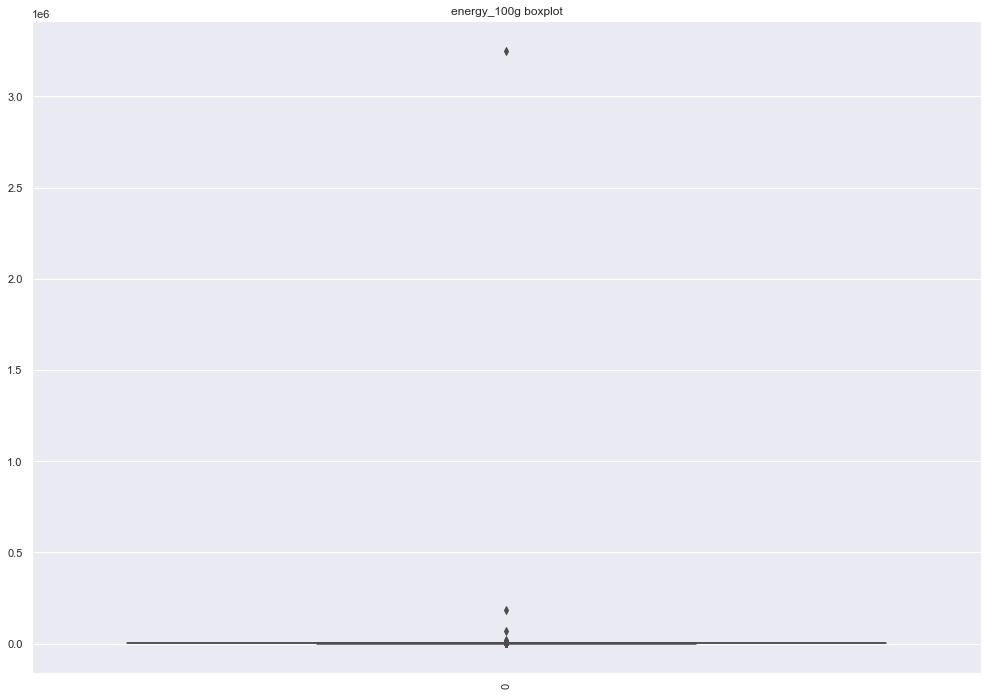

In [71]:
#on trace le boxplot de la variable energy 100g pour voir les outliers
fig = plt.figure(figsize=(17, 12))
ax = plt.axes()
plt.xticks(rotation=90)
sns.boxplot(data=df_cleaned['energy_100g']).set_title('energy_100g boxplot');

On voit que la variable "energy_100g" est en kJ

Enoncé : fields that end with _100g correspond to the amount of a nutriment (in g, or kJ for energy) for 100 g or 100 ml of product

In [72]:
df_cleaned[df_cleaned['energy_100g'] == 3.251373e+06]

,code,countries_fr,product_name,generic_name,nutrition_grade_fr,categories_fr,main_category_fr,pnns_groups_1,pnns_groups_2,ingredients_text,additives_fr,additives_n,quantity,ingredients_from_palm_oil_n,packaging,brands,stated_fr,labels_fr,stores,purchase_places,fiber_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,energy_100g
212928,3257983143096,France,Pois cassés,NaN,b,Pois-casses,Pois-casses,unknown,unknown,Pois cassés.,NaN,0.0,500 g,0.0,"Etui,Carton",Cora,"A vérifier,Complet,Informations nutritionnelle...",Point Vert,NaN,NaN,15.4,48.2,1.2,0.2,2.5,0.01,22.7,3251373.0


La valeur maximale de l'énergie pour 100g, c'est 900 000 cal donc 3765,6 kJ (1 cal = 0.004184kJ)

On va donc regarder toutes les lignes supérieures à 3800kJ

In [73]:
df_cleaned_sup_3800 = df_cleaned[df_cleaned['energy_100g'] > 3800].sort_values(by = 'energy_100g', ascending = False)
print(df_cleaned_sup_3800.shape)
df_cleaned_sup_3800.head()
#il y a donc 90 valeurs abérrantes pour la variable 'energy_100g'

(91, 28)


,code,countries_fr,product_name,generic_name,nutrition_grade_fr,categories_fr,main_category_fr,pnns_groups_1,pnns_groups_2,ingredients_text,additives_fr,additives_n,quantity,ingredients_from_palm_oil_n,packaging,brands,stated_fr,labels_fr,stores,purchase_places,fiber_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,energy_100g
212928,3257983143096,France,Pois cassés,NaN,b,Pois-casses,Pois-casses,unknown,unknown,Pois cassés.,NaN,0.0,500 g,0.0,"Etui,Carton",Cora,"A vérifier,Complet,Informations nutritionnelle...",Point Vert,NaN,NaN,15.4,48.2,1.2,0.20,2.5,0.01,22.7,3251373.0
249101,3661405001053,France,"Légume Noisettes Carottes, 500 Grammes, Marque...",NaN,d,NaN,NaN,unknown,unknown,NaN,NaN,NaN,500 g,NaN,NaN,Iglo,"A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,3.5,21.0,9.0,2.00,4.5,1.19,4.0,182764.0
219302,3270160689774,France,NaN,NaN,c,NaN,NaN,unknown,unknown,NaN,NaN,NaN,150 g,NaN,NaN,Picard,"A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,3.4,14.8,0.5,0.01,11.5,0.01,0.8,69292.0
245311,3596710288755,France,mini choux goût fromage de chèvre - poivre,biscuits apéritifs,e,"Snacks salés,Apéritif,Biscuits apéritifs,Produ...",Snacks salés,Salty snacks,Appetizers,matières grasses végétales de palme et de palm...,"E420 - Sorbitol,E100 - Curcumine,E160b - Rocou...",7.0,60 g,1.0,"étui carton,film plastique",Auchan,"A compléter,Informations nutritionnelles compl...",NaN,Simply market,Tours,0.0,190.0,380.0,210.00,22.7,9.33,0.0,18700.0
223318,3291960006127,France,Huiles vierge biologique de Colza - première p...,Huile de Colza Bio,c,"Aliments et boissons à base de végétaux,Alimen...",Huiles,Fat and sauces,Fats,Huile vierge de Colza Biologique,NaN,0.0,500 ml,0.0,Bouteille en verre,Emile noel,"A vérifier,Complet,Informations nutritionnelle...","Bio,Bio européen,AB Agriculture Biologique",NaN,France,0.0,0.0,100.0,8.00,0.0,0.00,0.0,15481.0


In [74]:
#on supprime les lignes depassant 3800kJ 
df_cleaned.drop(df_cleaned[df_cleaned['energy_100g'] > 3800].index, inplace=True)

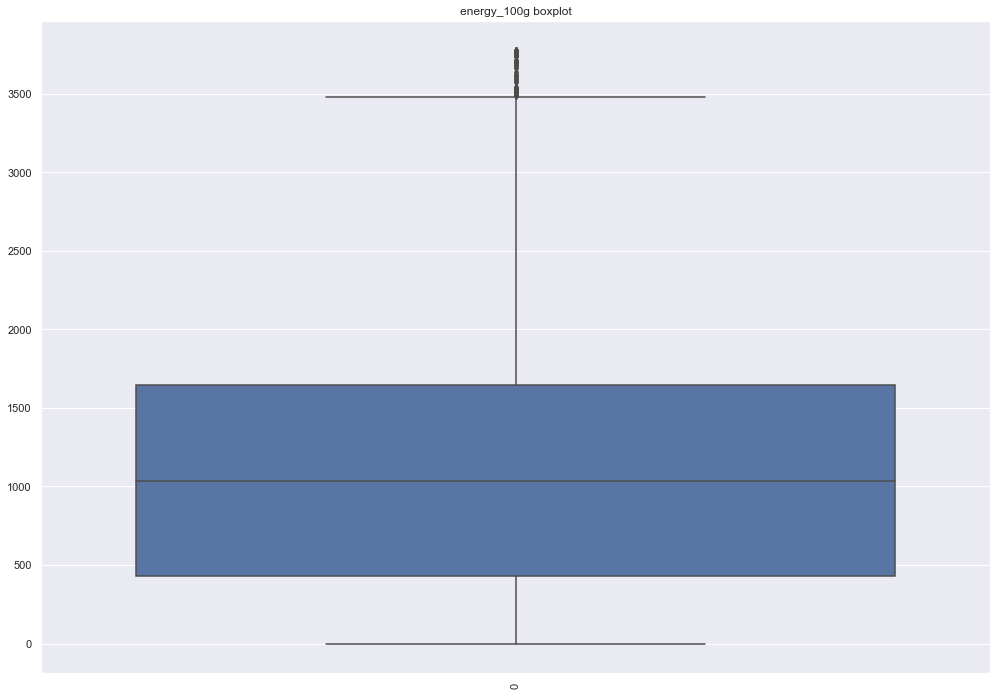

In [75]:
#on trace le boxplot de la variable energy 100g après supression des variables
fig = plt.figure(figsize=(17, 12))
ax = plt.axes()
plt.xticks(rotation=90)
sns.boxplot(data=df_cleaned['energy_100g']).set_title('energy_100g boxplot');
#on voit que les outliers commencent vers 3500kJ mais cela peut être des valeurs atypiques

#### Autres variables '_100g' : doivent être entre 0g et 100g

In [76]:
df_cleaned.columns

Index(['code', 'countries_fr', 'product_name', 'generic_name',
       'nutrition_grade_fr', 'categories_fr', 'main_category_fr',
       'pnns_groups_1', 'pnns_groups_2', 'ingredients_text', 'additives_fr',
       'additives_n', 'quantity', 'ingredients_from_palm_oil_n', 'packaging',
       'brands', 'stated_fr', 'labels_fr', 'stores', 'purchase_places',
       'fiber_100g', 'carbohydrates_100g', 'fat_100g', 'saturated-fat_100g',
       'sugars_100g', 'salt_100g', 'proteins_100g', 'energy_100g'],
      dtype='object')

In [77]:
#Variable 'sugar' avec des valeurs inférieur à 0
#on va donc regarder toutes les lignes supérieures à 3800kJ
df_cleaned_sugars_inf_0= df_cleaned[df_cleaned['sugars_100g'] <0 ].sort_values(by = 'sugars_100g', ascending = False)
print(df_cleaned_sugars_inf_0.shape)
df_cleaned_sugars_inf_0.head()

(1, 28)


,code,countries_fr,product_name,generic_name,nutrition_grade_fr,categories_fr,main_category_fr,pnns_groups_1,pnns_groups_2,ingredients_text,additives_fr,additives_n,quantity,ingredients_from_palm_oil_n,packaging,brands,stated_fr,labels_fr,stores,purchase_places,fiber_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,energy_100g
195761,3161712000928,France,Caprice des dieux,Fromage de France à pate molle,d,"Produits laitiers,Fromages,Fromages de vache",Fromages de vache,Milk and dairy products,Cheese,"_Lait_ de vache, _crème_, sel, ferments lactiq...",NaN,0.0,300g,0.0,"Carton,carton",Caprice des Dieux,"A compléter,Informations nutritionnelles compl...",NaN,Leclerc,"Houilles,France",NaN,0.8,30.0,21.0,-0.1,1.4,15.3,1379.0


In [78]:
#on remplace donc la valeur inférieur à 0 par 0 
df_cleaned['sugars_100g'][df_cleaned['code']==3161712000928] = 0
#On vérifie le remplacement de la valeur
df_cleaned[df_cleaned['code']==3161712000928]

,code,countries_fr,product_name,generic_name,nutrition_grade_fr,categories_fr,main_category_fr,pnns_groups_1,pnns_groups_2,ingredients_text,additives_fr,additives_n,quantity,ingredients_from_palm_oil_n,packaging,brands,stated_fr,labels_fr,stores,purchase_places,fiber_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,energy_100g
195761,3161712000928,France,Caprice des dieux,Fromage de France à pate molle,d,"Produits laitiers,Fromages,Fromages de vache",Fromages de vache,Milk and dairy products,Cheese,"_Lait_ de vache, _crème_, sel, ferments lactiq...",NaN,0.0,300g,0.0,"Carton,carton",Caprice des Dieux,"A compléter,Informations nutritionnelles compl...",NaN,Leclerc,"Houilles,France",NaN,0.8,30.0,21.0,0.0,1.4,15.3,1379.0


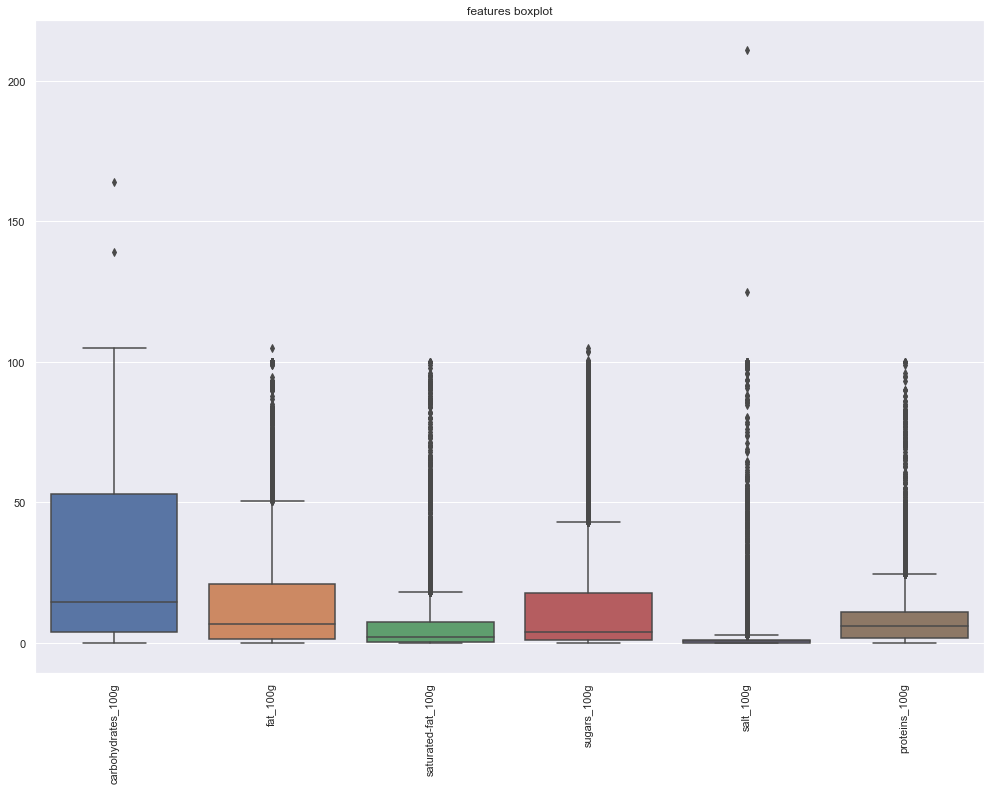

In [79]:
#On trace les boxplots des autres variables '_100g' (sauf energy_100g qui n'est pas en grammes)
#on sépare les valeurs catégorielles et quantitatives
df_cleaned_cat = df_cleaned.select_dtypes('object')
df_cleaned_num = df_cleaned.select_dtypes('float64')
df_cleaned_cat.set_index(df_cleaned.index)
df_cleaned_num.set_index(df_cleaned.index)

#on crée une liste avec les noms des variables qu'on veut afficher
features_num = df_cleaned_num.columns.tolist()[3:-1]
fig = plt.figure(figsize=(17, 12))
ax = plt.axes()
plt.xticks(rotation=90)
#on trace les boxplots des variables 
sns.boxplot(data=df_cleaned[features_num]).set_title('features boxplot');
#on voit plusieurs valeurs abérrantes

In [80]:
#Toutes les variables finissant par '_100g' ne sont pas censé dépasser la valeur de 100:
variable_to_drop = df_cleaned_num.columns.tolist()[3:-1]
#on supprime les valeurs supérieurs à 100g
for var in variable_to_drop :
    df_cleaned.drop(df_cleaned[df_cleaned[var] > 100].index, inplace=True)

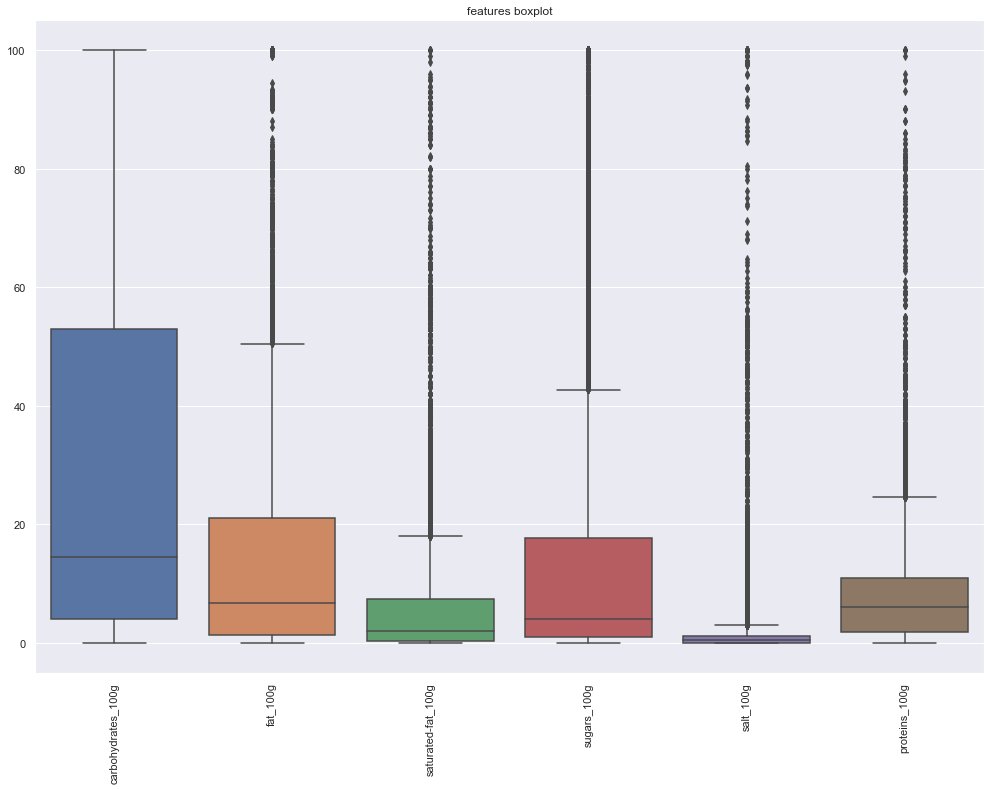

In [81]:
#On retrace les boxplots pour vérifier la suppression
features_num = df_cleaned_num.columns.tolist()[3:-1]
fig = plt.figure(figsize=(17, 12))
ax = plt.axes()
plt.xticks(rotation=90)
sns.boxplot(data=df_cleaned[features_num]).set_title('features boxplot');

In [82]:
df_cleaned.describe()

,additives_n,ingredients_from_palm_oil_n,fiber_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,energy_100g
count,53444.000000,53444.00000,45630.000000,47183.000000,47615.000000,62275.000000,62414.000000,62475.000000,64218.000000,64492.000000
mean,1.856916,0.06983,2.557458,27.738362,13.321263,5.419851,13.413343,1.154357,7.753776,1111.439813
std,2.561574,0.25858,4.617114,27.381722,16.834623,8.488335,19.057472,4.198764,7.885528,773.365579
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,4.000000,1.300000,0.300000,1.000000,0.080000,1.800000,427.000000
50%,1.000000,0.00000,1.400000,14.500000,6.800000,2.000000,4.000000,0.558800,6.000000,1033.000000
75%,3.000000,0.00000,3.200000,53.000000,21.000000,7.400000,17.700000,1.240000,10.945000,1648.000000
max,31.000000,2.00000,178.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,3774.000000


In [83]:
df_cleaned.shape

(98335, 28)

#### La valeur satured fat doit être inférieur à la valeur de fat : le gras saturé est inclus dans le gras

In [84]:
# on va supprimer les lignes pour ce cas : 
df_cleaned[(df_cleaned["fat_100g"] < df_cleaned["saturated-fat_100g"]) & (df_cleaned["fat_100g"] != 0)][["saturated-fat_100g","fat_100g"]]

,saturated-fat_100g,fat_100g
35809,27.00,26.90
54995,15.00,5.00
176935,73.80,54.80
177333,23.10,23.00
177460,14.50,9.94
177502,14.00,5.13
177503,17.00,4.23
193864,0.80,0.60
193875,0.80,0.60
195898,1.50,1.40


Dans les 2 cas suivants on va remplacer les valeurs de fat par celles de satured fat

In [85]:
# cas 1
df2 = df_cleaned[(df_cleaned["fat_100g"] == 0) & (df_cleaned["saturated-fat_100g"] != 0) & (df_cleaned["saturated-fat_100g"].notna())][["saturated-fat_100g","fat_100g"]]

In [86]:
#cas 2 
df_cleaned[(df_cleaned["fat_100g"].isna()) & (df_cleaned["saturated-fat_100g"].notna())][["saturated-fat_100g","fat_100g"]]

,saturated-fat_100g,fat_100g
190,0.80,NaN
191,2.90,NaN
234,11.00,NaN
307,1.70,NaN
456,8.60,NaN
...,...,...
320698,10.00,NaN
320734,3.40,NaN
320740,12.00,NaN
320741,1.00,NaN


Dans le cas suivant on va remplacer les valeurs de satured fat par celles de fat

In [87]:
#cas 3
df_cleaned[(df_cleaned["fat_100g"]==0) & (df_cleaned["saturated-fat_100g"].isna())][["saturated-fat_100g","fat_100g"]]

,saturated-fat_100g,fat_100g
11745,NaN,0.0
12780,NaN,0.0
13153,NaN,0.0
21582,NaN,0.0
43001,NaN,0.0
51489,NaN,0.0
57344,NaN,0.0
66122,NaN,0.0
73291,NaN,0.0
84467,NaN,0.0


In [88]:
def var_inclus(df,col1,col2):
    '''Fonction qui prends un argument le dataframe avec une variable (col1) donc les valeurs doivent être incluses
    dans une deuxième variable (col2)
    Elle permet à avoir accès aux index :
    - index_to_drop : l'index des produits dont la valeur de la col1 est supérieur à celle de la col2 
    et avec la valeur de la col2 différente de 0 : l'index des produits à supprimer du dataframe

    -index_to_replace_col2 : l'index des produits ou les valeurs de la col2 vont etre remplacé par ceux de la col1
    cas 1 : les index des produits dont la valeur de la col2 est nulle et celle de la col1 n'est pas égale à 0 ni un Nan
    cas 2 : les index des produits dont la valeur de la col2 est à un Nan et les valeurs de la col1 est pas un Nan 
    -index_to_replace_col1 : l'index des produits ou les valeurs de la col2 vont etre remplacé par ceux de la col1
    cas 3 : les index des produits dont la valeur de la col2 est nulle et celle de la col1 n'est pas égale à 0 ni un Nan
    
    Elle renvoie le dataframe apres suppression des index "index_to_drop" et modification des produits 'index_to_replace'
    '''
    index_to_drop = list()
    index_to_replace_col2 = list()
    index_to_replace_col1 = list()
    for index,row in df.iterrows():

        if (float(row[col1]) > float(row[col2])): 
            if float(row[col2]) != 0:
                index_to_drop.append(index)
        #cas 1
        if (float(row[col2]) == 0) & (float(row[col1]) != 0):
            if not (np.isnan(float(row[col1]))):
                index_to_replace_col2.append(index)
        #cas 2
        if (np.isnan(float(row[col2]))):
            if not (np.isnan(float(row[col1]))):
                index_to_replace_col2.append(index)

        #cas 3
        if (float(row[col2]) == 0):
            if (np.isnan(float(row[col1]))):
                index_to_replace_col1.append(index)
            
    print(len(index_to_drop),len(index_to_replace_col2),len(index_to_replace_col1))
    
    #on supprime les index du dataframe egal a index_to_drop
    df = df.drop(index = index_to_drop)
    
    #on remplace les valeurs de la variable col2 par les valeurs de la variable col1 pour les index qui sont egaux à index_to_replace_col2
    for index in index_to_replace_col2:
        df[col2][df.index == index] = df[col1][df.index == index]
    
    #on remplace les valeurs de la variable col1 par les valeurs de la variable col2 pour les index qui sont egaux à index_to_replace_col2
    for index in index_to_replace_col1:
        df[col1][df.index == index] = df[col2][df.index == index]
        
    print(df.shape)
    return df

On va appliquer la fonction "var_inclus" a df_cleaned pour fat et satured_fat :
- si une valeur de "saturated-fat_100g" est supérieur à "fat_100g" : pas normal le gras saturé est compris dans le gras : supprime les produits ou la valeur de saturated fat est superieur à fat

Pour le cas ou fat est nul/nan et satured_fat est non nul, on peut se dire qu'il n'y a que du gras saturé dans le produit donc l'utilisateur a rentré que la valeur que du gras saturé et pas celle du gras.

On va donc remplacer les valeurs de la colonne "satured fat" par celles de la colonne "fat", dans les cas suivant :

- cas 1 : quand les valeurs de la colonne "fat" sont nulles et que celles de "satured_fat" sont remplies (ni nulles ni Nan)

- cas 2 : quand les valeurs de la colonne "fat" sont des Nan et celles de "satured fat" ne sont pas des Nan


Pour le cas ou satured fat est un Nan et fat est nul : 
- cas 3 : on va remplacer la valeur de satured fat par 0

In [89]:
df_cleaned_2 = var_inclus(df_cleaned,'saturated-fat_100g','fat_100g')

51 17125 224
(98284, 28)


In [90]:
missingValues(df_cleaned_2)

,Variable Name,Count,Percentage
0,additives_fr,67857,69.04
1,labels_fr,63199,64.30
2,stores,60284,61.34
3,generic_name,60030,61.08
4,purchase_places,54976,55.94
5,fiber_100g,52697,53.62
6,carbohydrates_100g,51151,52.04
7,ingredients_from_palm_oil_n,44878,45.66
8,additives_n,44878,45.66
9,ingredients_text,44878,45.66


#### La valeur sugar doit être inférieur à la valeur de carbohydrates : le sucre est inclus dans les glucides

In [91]:
#si une valeur de "sugar" est supérieur à "carbohydrates" : pas normal sugar est compris dans carbohydrates
#On va faire la même chose que pour "fat" et "satured_fat"
df_cleaned = var_inclus(df_cleaned_2,'sugars_100g','carbohydrates_100g')

83 17251 166
(98201, 28)


#### La somme des variables _100g doit être inférieur à 100g

In [92]:
df_cleaned_num.columns

Index(['additives_n', 'ingredients_from_palm_oil_n', 'fiber_100g',
       'carbohydrates_100g', 'fat_100g', 'saturated-fat_100g', 'sugars_100g',
       'salt_100g', 'proteins_100g', 'energy_100g'],
      dtype='object')

In [93]:
#on regarde si la somme des variables _100g est supérieur à 100: si oui, pas normal 
#on crée un dataframe en enlevant les variables qu'on ne va pas ajouter car inclu dans une autre
df_somme = df_cleaned[['fiber_100g', 'carbohydrates_100g', 'fat_100g', 'salt_100g', 'proteins_100g']]
#on remplace les valeurs manquantes par 0
df_somme= df_somme.fillna(0)
#on crée une colonne contenant la somme des variables 
df_somme['somme'] = df_somme.sum(axis = 1)

#on va chercher les index où il y a la somme supérieur à 100g
index_to_drop = list()
for index,row in df_somme.iterrows():        
    if float(row['somme']) > float(100):
        index_to_drop.append(index)
print(len(index_to_drop))

537


In [94]:
#on regarde les produits dont la somme est supérieur à 100g
df_somme.loc[index_to_drop]

,fiber_100g,carbohydrates_100g,fat_100g,salt_100g,proteins_100g,somme
11272,5.40,57.80,32.400,0.800100,5.10,101.500100
11273,5.80,66.50,25.300,0.800000,3.80,102.200000
11274,5.10,65.30,25.900,0.900000,4.30,101.500000
11275,4.20,60.10,30.400,0.700000,4.90,100.300000
11278,6.50,74.20,14.500,0.736600,6.50,102.436600
12812,7.10,64.29,25.000,0.543560,7.14,104.073560
12989,4.76,66.70,16.700,1.090000,11.90,101.150000
12998,7.41,81.50,3.700,1.600000,7.41,101.620000
22341,4.60,60.71,27.500,1.841500,7.14,101.791500
25067,10.70,67.90,7.140,0.680000,14.30,100.720000


In [95]:
#on va suprimer les produits correspondants dans df_cleaned
df_cleaned = df_cleaned.drop(index = index_to_drop)

In [96]:
df_cleaned.shape
#on passe à 97 664 lignes

(97664, 28)

### On regarde les valeurs abérrantes des variables qualitatives

In [97]:
df_cleaned.describe(exclude = [np.number])

,code,countries_fr,product_name,generic_name,nutrition_grade_fr,categories_fr,main_category_fr,pnns_groups_1,pnns_groups_2,ingredients_text,additives_fr,quantity,packaging,brands,stated_fr,labels_fr,stores,purchase_places
count,97664,97664,90477,37920,60675,61391,61391,64279,66435,52929,30200,70646,58441,85659,97664,34767,37699,42958
unique,97664,302,73769,27078,5,15548,1600,13,41,48607,11456,9588,10865,20864,817,9720,2157,3897
top,3087,France,Huile d'olive vierge extra,Pâtes alimentaires au blé dur de qualité supér...,d,"Snacks sucrés,Biscuits et gâteaux,Biscuits",Boissons,unknown,unknown,Semoule de _blé_ dur de qualité supérieure.,E322 - Lécithines,500 g,"Sachet,Plastique",Carrefour,"A vérifier,Complet,Informations nutritionnelle...","Bio,Bio européen,AB Agriculture Biologique",Carrefour,France
freq,1,93683,59,201,16715,557,4426,12382,12382,110,1687,3265,2075,2816,16741,5230,5503,11642


#### Pour la variable 'main_category_fr'

In [98]:
#on regarde les différentes catégories de produits pour voir si il y en a à enlever
df_cleaned['main_category_fr'].unique().tolist()

[nan,
 'Aliments et boissons à base de végétaux',
 'Root-bier',
 'Sablés',
 'Bonbons',
 'Thés',
 'Sirops',
 'Sodas',
 'Sodas aux fruits',
 'Gâteaux',
 'Pâtisseries',
 'Viandes',
 'Produits à tartiner',
 'Poissons et viandes et oeufs',
 'Pate-au-foie-de-canard',
 'Condiments',
 'Cookies',
 'Plats à base de viande',
 'en:Carrot-coriander-soup',
 'en:Charcuteries',
 'Soupes',
 'Chocolats',
 'Boissons',
 'Sandwichs',
 'en:Harengs',
 'Fromages de vache',
 'it:Vinaigre-balsamique',
 'Pâtes à tartiner',
 'en:Petit-dejeuners',
 'Chips et frites',
 'Surgelés',
 'Sauce-aux-piments',
 'Epicerie',
 'Crustacés',
 'Biscuits',
 'en:Vanilla-soymilk',
 'Snacks salés',
 'Fruits à coques',
 'Vinaigres',
 'Plats préparés',
 'Fromages',
 'Nuggets-de-dinde',
 'Snacks sucrés',
 'Pancake',
 'Conserves',
 'en:Coconut-creams',
 'Laits',
 'Jus de fruits',
 'Jus-de-noix-de-coco',
 'en:Coconut-waters',
 'Beurres',
 'Sodas light',
 'Pâtes alimentaires',
 'Pain-a-l-ail',
 'Compléments alimentaires',
 'Sauces-de-pois

In [99]:
#on supprime les produits non alimentaire du dataframe
df_cleaned = df_cleaned[df_cleaned['main_category_fr'].str.contains('Non alimentaire',na=False)==False]


In [100]:
df_cleaned.shape

(97493, 28)

#### Pour les variables 'pnns_groups_1' et 'pnns_groups_2'

In [101]:
#on va traiter les valeurs 'unknown' en les remplacant par des Nan
df_cleaned[df_cleaned['pnns_groups_1'] == 'unknown'][['categories_fr','main_category_fr','pnns_groups_1','pnns_groups_2']]


,categories_fr,main_category_fr,pnns_groups_1,pnns_groups_2
106,NaN,NaN,unknown,unknown
136,NaN,NaN,unknown,unknown
138,NaN,NaN,unknown,unknown
183,Root-bier,Root-bier,unknown,unknown
189,"Sirops,Sirops-pour-ganache",Sirops,unknown,unknown
...,...,...,...,...
320670,NaN,NaN,unknown,unknown
320685,en:Malt-vinegar,en:Malt-vinegar,unknown,unknown
320696,NaN,NaN,unknown,unknown
320736,"Attieke,Manioc,Semoules-de-manioc",Attieke,unknown,unknown


In [102]:
df_cleaned['pnns_groups_1'].isna().sum()

33385

In [103]:
#on remplace "unknown" par un nan
df_cleaned['pnns_groups_1'].replace('unknown', np.nan, inplace = True)
df_cleaned['pnns_groups_2'].replace('unknown', np.nan, inplace = True)

In [104]:
df_cleaned['pnns_groups_1'].isna().sum()

45596

In [105]:
#on verifie qu'il y a bien plus de unknown
df_cleaned[df_cleaned['pnns_groups_1'] == 'unknown'][['categories_fr','main_category_fr','pnns_groups_1','pnns_groups_2']]


,categories_fr,main_category_fr,pnns_groups_1,pnns_groups_2


In [106]:
df_cleaned['pnns_groups_1'].unique()

array([nan, 'Cereals and potatoes', 'Sugary snacks', 'Beverages',
       'Fish Meat Eggs', 'Composite foods', 'Fruits and vegetables',
       'Milk and dairy products', 'Salty snacks', 'Fat and sauces',
       'fruits-and-vegetables', 'sugary-snacks', 'cereals-and-potatoes'],
      dtype=object)

In [107]:
#on voit dans pnns_groups_1 des variations orthographiques : 
# par exemple les valeurs 'Fruits and vegetables' et 'fruits-and-vegetables' doivent être fusionnées
#la fonction clean_variable permet de remplacer ces variables par leurs bonnes orthographes à l'aide d'un dictionnaire
def clean_variable(row, clean_dict):
    for key, value in clean_dict.items():
        if row["pnns_groups_1"] == key:
            row["pnns_groups_1"] = value
            
    return row["pnns_groups_1"]

In [108]:
clean_dict = {"cereals-and-potatoes":"Cereals and potatoes",
              "fruits-and-vegetables":"Fruits and vegetables",
              "sugary-snacks":"Sugary snacks",
              "salty-snacks":"Salty snacks" }

df_cleaned["pnns_groups_1"] = df_cleaned.apply(clean_variable,axis=1,clean_dict=clean_dict)


print(f"Nombre de modalités pour la variable pnns_groups_1: {df_cleaned['pnns_groups_1'].nunique()}")
print("Liste des modalités de la variable pnns_groups_1")
df_cleaned["pnns_groups_1"].unique()

Nombre de modalités pour la variable pnns_groups_1: 9
Liste des modalités de la variable pnns_groups_1


array([nan, 'Cereals and potatoes', 'Sugary snacks', 'Beverages',
       'Fish Meat Eggs', 'Composite foods', 'Fruits and vegetables',
       'Milk and dairy products', 'Salty snacks', 'Fat and sauces'],
      dtype=object)

## Gestion des valeurs manquantes 

In [109]:
#On regarde les valeurs manquantes restantes 
missingValues(df_cleaned)
#on voit qu'elles sont surtout sur les variables catégorielles

,Variable Name,Count,Percentage
0,additives_fr,67295,69.03
1,labels_fr,62727,64.34
2,stores,59796,61.33
3,generic_name,59575,61.11
4,purchase_places,54535,55.94
5,fiber_100g,52457,53.81
6,pnns_groups_1,45596,46.77
7,ingredients_text,44568,45.71
8,additives_n,44568,45.71
9,ingredients_from_palm_oil_n,44568,45.71


In [110]:
df_cleaned.shape

(97493, 28)

### On supprime les variables dont on ne va pas se servir

In [111]:
compare_NaN(df_cleaned,'categories_fr','pnns_groups_2')

Cas où categories_fr est renseigné mais pas pnns_groups_2 : 7.3513%
Cas où pnns_groups_2 est renseigné mais pas categories_fr : 0.0%
Cas où categories_fr et pnns_groups_2 sont renseignés tous les deux : 55.44295%


In [112]:
compare_NaN(df_cleaned,'categories_fr','pnns_groups_1')

Cas où categories_fr est renseigné mais pas pnns_groups_1 : 9.56274%
Cas où pnns_groups_1 est renseigné mais pas categories_fr : 0.0%
Cas où categories_fr et pnns_groups_1 sont renseignés tous les deux : 53.23151%


In [113]:
compare_NaN(df_cleaned,'pnns_groups_1','pnns_groups_2')

Cas où pnns_groups_1 est renseigné mais pas pnns_groups_2 : 0.0%
Cas où pnns_groups_2 est renseigné mais pas pnns_groups_1 : 2.21144%
Cas où pnns_groups_1 et pnns_groups_2 sont renseignés tous les deux : 53.23151%


In [114]:
compare_NaN(df_cleaned,'main_category_fr','pnns_groups_2')

Cas où main_category_fr est renseigné mais pas pnns_groups_2 : 7.3513%
Cas où pnns_groups_2 est renseigné mais pas main_category_fr : 0.0%
Cas où main_category_fr et pnns_groups_2 sont renseignés tous les deux : 55.44295%


In [115]:
compare_NaN(df_cleaned,'main_category_fr','pnns_groups_1')

Cas où main_category_fr est renseigné mais pas pnns_groups_1 : 9.56274%
Cas où pnns_groups_1 est renseigné mais pas main_category_fr : 0.0%
Cas où main_category_fr et pnns_groups_1 sont renseignés tous les deux : 53.23151%


In [116]:
data = df_cleaned[(df_cleaned['pnns_groups_2'].isna())&(df_cleaned['categories_fr'].notna())][['product_name','categories_fr','main_category_fr','pnns_groups_1','pnns_groups_2']]
df = data['categories_fr'].unique()
df

array(['Root-bier', 'Sirops,Sirops-pour-ganache',
       "Aliments et boissons à base de végétaux,Aliments d'origine végétale,Produits à tartiner,Pâtes à tartiner végétaux,Fruits à coques et dérivés,Crèmes de marrons",
       ..., 'en:Cremes-vegetales-a-base-de-coco-pour-cuisiner',
       'en:Malt-vinegar', 'Attieke,Manioc,Semoules-de-manioc'],
      dtype=object)

In [117]:
df_cleaned['pnns_groups_2'].unique()

array([nan, 'Legumes', 'Biscuits and cakes', 'Sweets',
       'Non-sugared beverages', 'Sweetened beverages', 'Meat',
       'One-dish meals', 'Soups', 'Chocolate products',
       'Alcoholic beverages', 'Sandwich', 'Cheese', 'Appetizers',
       'Dressings and sauces', 'Dried fruits', 'Nuts',
       'Pizza pies and quiche', 'Fruits', 'Fruit juices', 'Fats',
       'Cereals', 'Vegetables', 'Bread', 'Breakfast cereals',
       'Processed meat', 'vegetables', 'Ice cream', 'Fish and seafood',
       'pastries', 'Milk and yogurt', 'Dairy desserts', 'Tripe dishes',
       'Artificially sweetened beverages', 'Fruit nectars', 'Potatoes',
       'Eggs', 'fruits', 'Salty and fatty products', 'legumes', 'cereals'],
      dtype=object)

In [118]:
df_cleaned['pnns_groups_1'].unique()

array([nan, 'Cereals and potatoes', 'Sugary snacks', 'Beverages',
       'Fish Meat Eggs', 'Composite foods', 'Fruits and vegetables',
       'Milk and dairy products', 'Salty snacks', 'Fat and sauces'],
      dtype=object)

In [119]:
compare_NaN(df_cleaned,'main_category_fr','categories_fr')

Cas où main_category_fr est renseigné mais pas categories_fr : 0.0%
Cas où categories_fr est renseigné mais pas main_category_fr : 0.0%
Cas où main_category_fr et categories_fr sont renseignés tous les deux : 62.79425%


On va donc garder pnns_groups_1 et pnns_groups_2 car il n'y a pas autant de valeurs unique que pour 'main_category_fr' et 'categories_fr' même si il y a un peu plus de valeurs manquantes


#### Variables 'generic_name' et 'product_name'

In [120]:
#on regarde les valeurs manquantes de generic name et product name
compare_NaN(df_cleaned,'generic_name','product_name')

Cas où generic_name est renseigné mais pas product_name : 0.05231%
Cas où product_name est renseigné mais pas generic_name : 53.86028%
Cas où generic_name et product_name sont renseignés tous les deux : 38.84074%


On supprime generic name qui ne nous apporte rien de plus que product name.

#### Variables ingredients_text','additives_n' et 'ingredients_from_palm_oil_n'

In [121]:
#on remarque que les variables 'ingredients_text','additives_n','ingredients_from_palm_oil_n' ont des valeurs manquantes en même temps
df_cleaned[df_cleaned['ingredients_text'].isna()][['product_name','nutrition_grade_fr','ingredients_text','additives_n','ingredients_from_palm_oil_n']]
# On supprime ces variables car elles ne vont pas être très utile à l'idée d'application


,product_name,nutrition_grade_fr,ingredients_text,additives_n,ingredients_from_palm_oil_n
0,Farine de blé noir,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
136,Twix x2,NaN,NaN,NaN,NaN
138,Pack de 2 Twix,NaN,NaN,NaN,NaN
183,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
320757,Amandes,b,NaN,NaN,NaN
320760,Poireaux,NaN,NaN,NaN,NaN
320761,Roussette du Bugey (2011),NaN,NaN,NaN,NaN
320764,"Cheese cake thé vert, yuzu",NaN,NaN,NaN,NaN


On supprime aussi additives_n,ingredients_from_palm_oil_n et ingredients_text

In [122]:
#On crée un dataframe final avec les variables inutiles à l'étude supprimées
df_final = df_cleaned.drop(columns = ['generic_name',
                                     'additives_fr',
                                     'categories_fr',
                                     'countries_fr',
                                     'packaging',
                                     'stores',
                                     'labels_fr',
                                     'stated_fr',
                                     'quantity',
                                     'purchase_places',
                                    'main_category_fr',
                                     'categories_fr',
                                    'additives_n',
                                     'ingredients_from_palm_oil_n',
                                    'ingredients_text'])

### Nettoyage des variables

In [123]:
missingValues(df_final)

,Variable Name,Count,Percentage
0,fiber_100g,52457,53.81
1,pnns_groups_1,45596,46.77
2,pnns_groups_2,43440,44.56
3,nutrition_grade_fr,36820,37.77
4,salt_100g,35677,36.59
5,saturated-fat_100g,35655,36.57
6,sugars_100g,35574,36.49
7,proteins_100g,33949,34.82
8,carbohydrates_100g,33741,34.61
9,energy_100g,33674,34.54


In [124]:
df_final.shape


(97493, 14)

#### On va supprimer les produits pour lesquels il y a plus de la moitié des variables 100g en Nan

In [125]:
all_na = df_final[df_final["energy_100g"].isna()
                    & df_final["proteins_100g"].isna()
                    & df_final["sugars_100g"].isna()
                    & df_final["fat_100g"].isna()
                    & df_final["saturated-fat_100g"].isna()
                    & df_final["carbohydrates_100g"].isna()
                    & df_final["salt_100g"].isna()
                    & df_final["fiber_100g"].isna()]

In [126]:
#il y a 33 213 produits avec toutes les variables _100g vides
all_na.shape

(33045, 14)

In [127]:
#On supprime les lignes avec plus de "thresh" valeurs manquantes sur les colonnes contenant 100g
#il y a 8 variables _100g donc on va supprimer les produits pour lesquels il y a au moins 4 variables rempli
df_final = df_final.dropna(axis='index',thresh =4,subset=[i for i in df_final.columns if i.endswith('100g')])


In [128]:
df_final.shape
#on passe de 97 493 à 63 670 lignes

(63676, 14)

#### Pour la variable fiber

In [129]:
#remplacer les valeurs manquantes de la variable Fiber par 0
# Pas beaucoup de produits ont des fibres donc on suppose que si c'est manquant c'est qu'il n'y en a pas
df_final['fiber_100g'] = df_final['fiber_100g'].fillna(0)

#### Pour la variable sel

In [130]:
#Remplissage par la médiane par catégorie de produit de la variable Salt 
df_final.loc[df_final['salt_100g'].isnull(),:].shape

(1969, 14)

In [131]:
df_final[df_final['salt_100g'].isna() & df_final["pnns_groups_2"].notna()]

,code,product_name,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,brands,fiber_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,energy_100g
11299,14113230018,Almonds,NaN,Fruits and vegetables,Dried fruits,Wonderful,0.0,21.70,49.4,3.7,3.9,NaN,21.20,2406.0
11745,14816001007,Vinaigre basalmique bio,NaN,Fat and sauces,Dressings and sauces,Bioitalia,0.0,27.20,0.0,0.0,NaN,NaN,0.70,444.9
66122,55828051505,Miel de Fleurs de Bleuetière,NaN,Sugary snacks,Sweets,Musée de l'abeille,0.0,17.00,0.0,0.0,16.0,NaN,0.00,251.0
69175,70177287009,Twinings fresh thé vert citron,NaN,Beverages,Non-sugared beverages,Twinings of London,0.5,0.50,0.1,0.1,0.5,NaN,0.30,17.0
79932,72252227870,Old English Hunt Orange Marmalade,NaN,Sugary snacks,Sweets,Fortnum & Mason,0.0,65.00,0.1,NaN,65.0,NaN,0.80,1125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316844,8850620888012,Sauce poisson (NUOC MAN),NaN,Fat and sauces,Dressings and sauces,Squid,0.0,2.94,0.0,0.0,NaN,NaN,9.47,211.0
317096,8852634051000,Lait de coco,NaN,Beverages,Non-sugared beverages,CAP TROPICAL,0.0,1.00,5.0,NaN,NaN,NaN,0.00,50.0
317608,8934563168162,Mì không chiên ăn liền Mikochi,NaN,Cereals and potatoes,Cereals,Vina Acecook,0.0,52.10,5.1,NaN,NaN,NaN,8.70,292.0
318526,9120002550011,Oxygizer,NaN,Beverages,Non-sugared beverages,Oxygizer,0.0,0.00,0.0,0.0,0.0,NaN,0.00,0.0


In [132]:
df_final.loc[df_final['salt_100g'].isnull(),:]

,code,product_name,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,brands,fiber_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,energy_100g
138,39529,Pack de 2 Twix,NaN,NaN,NaN,"Twix, Lundberg",6.2,77.08,4.17,NaN,NaN,NaN,6.25,1481.0
11299,14113230018,Almonds,NaN,Fruits and vegetables,Dried fruits,Wonderful,0.0,21.70,49.40,3.7,3.9,NaN,21.20,2406.0
11745,14816001007,Vinaigre basalmique bio,NaN,Fat and sauces,Dressings and sauces,Bioitalia,0.0,27.20,0.00,0.0,NaN,NaN,0.70,444.9
66122,55828051505,Miel de Fleurs de Bleuetière,NaN,Sugary snacks,Sweets,Musée de l'abeille,0.0,17.00,0.00,0.0,16.0,NaN,0.00,251.0
69175,70177287009,Twinings fresh thé vert citron,NaN,Beverages,Non-sugared beverages,Twinings of London,0.5,0.50,0.10,0.1,0.5,NaN,0.30,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317096,8852634051000,Lait de coco,NaN,Beverages,Non-sugared beverages,CAP TROPICAL,0.0,1.00,5.00,NaN,NaN,NaN,0.00,50.0
317608,8934563168162,Mì không chiên ăn liền Mikochi,NaN,Cereals and potatoes,Cereals,Vina Acecook,0.0,52.10,5.10,NaN,NaN,NaN,8.70,292.0
318526,9120002550011,Oxygizer,NaN,Beverages,Non-sugared beverages,Oxygizer,0.0,0.00,0.00,0.0,0.0,NaN,0.00,0.0
320437,94185454,Kiwi,NaN,Fruits and vegetables,Fruits,Zespri,0.0,0.00,0.00,0.0,0.0,NaN,0.00,NaN


In [133]:
#on va utiliser pnns_groups_2 pour faire la moyenne du sel
list_cat = df_final['pnns_groups_2'].unique().tolist()[1:]
#on parcourt le dataframe df_final avec la valeur de sel manquante
for i,row in df_final.loc[df_final['salt_100g'].isnull(),:].iterrows():
#on parcourt les categories de pnns_groups_2
    for category in list_cat:
#on remplace la valeur nan par la mediane de sel par catégorie
        if row['pnns_groups_2'] == category:
            df_final.loc[i,'salt_100g'] = df_final[df_final['pnns_groups_2'] == category]['salt_100g'].median()

In [134]:
df_final.loc[df_final['salt_100g'].isnull(),:].shape
#il nous reste 325 lignes avec des Nan pour la variable sel au lieu de 1936

(327, 14)

In [135]:
df_final.loc[df_final['salt_100g'].isnull(),:]

,code,product_name,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,brands,fiber_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,energy_100g
138,39529,Pack de 2 Twix,NaN,NaN,NaN,"Twix, Lundberg",6.20,77.08,4.170,NaN,NaN,NaN,6.250,1481.00
79931,72252227849,NaN,NaN,NaN,NaN,NaN,0.00,65.00,0.100,NaN,NaN,NaN,0.800,1125.00
112704,0201556053209,Filet mignon de porc surgelé Picard,NaN,NaN,NaN,Picard,0.00,0.00,2.000,NaN,0.00,NaN,22.000,448.00
118567,613668024006,Préparation à l'ancienne pour crêpes et gaufres,NaN,NaN,NaN,Mississippi Belle,0.00,67.00,4.000,NaN,NaN,NaN,9.000,1440.00
136316,728633101467,Sitec Nutrition 100% whey protein professional,NaN,NaN,NaN,sitec,0.00,12.70,5.000,3.33,5.00,NaN,73.300,1630.00
155750,838948001137,NaN,NaN,NaN,NaN,Shneider's,0.00,62.00,25.000,NaN,NaN,NaN,6.000,2079.00
175469,2000000006745,Le Classic,NaN,NaN,NaN,Nabab,0.00,25.10,8.600,NaN,NaN,NaN,13.500,975.00
175806,2000000020888,Lotao Wizard of Laos,NaN,NaN,NaN,NaN,0.00,79.00,1.500,NaN,NaN,NaN,8.000,1542.00
176046,2000000026719,Crêpes au konjac et au tofu soyeux Dukan,NaN,NaN,NaN,DUKAN,1.20,10.00,4.500,1.10,0.00,NaN,16.000,703.00
176143,2000000030978,crème de marron,NaN,NaN,NaN,Bouillet,0.00,63.05,0.900,NaN,NaN,NaN,0.300,1082.00


#### Pour la variable proteins_100g

In [136]:
df_final.loc[df_final['proteins_100g'].isnull(),:].shape

(184, 14)

La valeur énergétique correspond à l’apport calorique de l’aliment, pour exemple :
- 1g de protéine = 17 kJ = 4 kcal
- 1g de lipide = 38 kJ = 9 kcal : c'est la variable "fat_100g"
- 1g de Glucides = 17 kJ = 4 kcal : c'est la variable "carbohydrates_100g"

(On sait que satured_fat est inclus dans fat et sugar dans carbohydrates)

On a donc une equation : energy_100g (kJ) = proteins_100g (g) x 17 + fat_100g (g) x 38 + carbohydrates_100g (g) x 17

donc proteins_100g (g) = (energy_100g (kJ) - fat_100g (g) x 38 - carbohydrates_100g (g) x 17) / 17

On va donc appliquer l'equation

In [137]:
#On fait une boucle for pour calculer la variable proteins avec la formule trouvée
proteins = 0 
#On va parcourir les lignes du dataframe df_final avec des valeurs de proteines nulles
for i,row in df_final.loc[df_final['proteins_100g'].isna(),:].iterrows():
    #on ne va calculer la variable proteine que si les variables fat, carbohydrates et energy ne sont pas des Nan
    if not ((np.isnan(float(row["fat_100g"])))):
            if not (np.isnan(float(row["carbohydrates_100g"]))):
                if not (np.isnan(float(row["energy_100g"]))):
                    proteins = (df_final.loc[i,'energy_100g'] - df_final.loc[i,'fat_100g']*38 - df_final.loc[i,'carbohydrates_100g']*17)/17
                    #On remplace la variable proteins que si la valeur calculée est positive
                    if proteins > 0 : 
                        df_final.loc[i,'proteins_100g'] = proteins

In [138]:
#il ne reste que 62 lignes avec la variable proteins manquante
df_final.loc[df_final['proteins_100g'].isnull(),:].shape

(63, 14)

In [139]:
df_proteins_nan = df_final.loc[df_final['proteins_100g'].isnull(),:]
df_proteins_nan

,code,product_name,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,brands,fiber_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,energy_100g
115644,422114883605,Omega3 doux,NaN,NaN,NaN,St hubert,0.00,NaN,50.00,14.00,NaN,0.400000,NaN,1850.0
118314,612511318903,Sirop erable,NaN,NaN,NaN,"1883,Philibert Routin",0.00,80.00,0.00,0.00,80.00,0.033300,NaN,1340.0
124200,682432002052,Sirop d'érable,NaN,NaN,NaN,NaN,0.00,90.00,NaN,NaN,80.00,0.042300,NaN,1530.0
181780,21141881,Mouliné de 7 légumes variés,NaN,NaN,NaN,Toque du chef,0.00,1.41,1.20,0.39,1.41,0.721000,NaN,36.9
184330,26001463,Bambo Citron,NaN,Beverages,Non-sugared beverages,Bambo,0.00,1.35,NaN,NaN,1.03,0.007000,NaN,91.0
188704,3023430535505,Le Fleurier Doux,NaN,Fat and sauces,Fats,Le Fleurier,0.00,0.60,53.00,26.00,0.60,0.400000,NaN,1971.0
192106,3068320114453,Eau minérale naturelle,NaN,Beverages,Non-sugared beverages,"Badoit,Danone",0.00,0.00,0.00,0.00,0.00,0.045720,NaN,0.0
200549,3222472949275,Huile de pépins de raisins,NaN,Fat and sauces,Fats,Casino,0.00,0.00,100.00,13.00,0.00,0.000000,NaN,3700.0
203985,3245412730917,Dessert de fruits Pomme Fraise (x 4),NaN,Fruits and vegetables,Fruits,Carrefour,1.80,16.00,NaN,NaN,16.00,0.010000,NaN,301.0
204037,3245412961953,Vinaigre de vin au jus de framboise,NaN,Fat and sauces,Dressings and sauces,"Carrefour Sélection,Carrefour",0.00,3.80,NaN,NaN,2.20,0.029972,NaN,153.0


In [140]:
#On remarque qu'il y a pleins de valeurs abérrantes dans les lignes pour lesquels proteins est Nan
df_final[df_final["energy_100g"].notna()
                    & df_final["proteins_100g"].isna()
                    & df_final["sugars_100g"].notna()
                    & df_final["fat_100g"].notna()
                    & df_final["saturated-fat_100g"].notna()
                    & df_final["carbohydrates_100g"].notna()
                    & df_final["salt_100g"].notna()
                    & df_final["fiber_100g"].notna()]

,code,product_name,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,brands,fiber_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,energy_100g
118314,612511318903,Sirop erable,NaN,NaN,NaN,"1883,Philibert Routin",0.00,80.00,0.0,0.00,80.00,0.03330,NaN,1340.0
181780,21141881,Mouliné de 7 légumes variés,NaN,NaN,NaN,Toque du chef,0.00,1.41,1.2,0.39,1.41,0.72100,NaN,36.9
188704,3023430535505,Le Fleurier Doux,NaN,Fat and sauces,Fats,Le Fleurier,0.00,0.60,53.0,26.00,0.60,0.40000,NaN,1971.0
192106,3068320114453,Eau minérale naturelle,NaN,Beverages,Non-sugared beverages,"Badoit,Danone",0.00,0.00,0.0,0.00,0.00,0.04572,NaN,0.0
200549,3222472949275,Huile de pépins de raisins,NaN,Fat and sauces,Fats,Casino,0.00,0.00,100.0,13.00,0.00,0.00000,NaN,3700.0
204798,3248832921224,Tarte au oignions et lardon,NaN,NaN,NaN,Marie,2.10,24.10,12.5,6.20,2.80,0.83820,NaN,235.0
208243,3252161430005,Eau aromatisée gazeuse citron-citron vert-verv...,NaN,Beverages,Non-sugared beverages,Arcens,0.00,0.00,0.0,0.00,0.00,0.00000,NaN,0.0
208574,3254550020262,Beurre d'Isigny extra fin,NaN,Fat and sauces,Fats,Isigny Ste Mère,0.70,0.50,82.0,59.00,0.50,0.08000,NaN,3054.0
212059,3257980030573,Tournesol tartine & cuisson allégée,NaN,Fat and sauces,Fats,Cora,0.00,0.00,50.0,11.00,0.00,0.30000,NaN,1880.0
214740,3263850029912,Huile de colza vierge bio,NaN,Fat and sauces,Fats,Leader Price,0.00,0.00,100.0,8.00,0.00,0.00000,NaN,3700.0


In [141]:
#on décide donc de les supprimer
df_final = df_final.dropna(subset = ['proteins_100g'],axis = 0)

In [142]:
#on verifie qu'il n'y a plus de valeurs manquantes 
df_final['proteins_100g'].isna().sum()

0

#### Pour les variables pnns_groups_1 et pnns_groups_2 

On decide de supprimer les produits ayant des valeurs manquantes pour ces colonnes car elles sont importantes et que ca va être compliqué de les remplir correctement

In [143]:
df_final = df_final.dropna(subset ='pnns_groups_1', axis =0)

#### Pour la variable "product_name"

In [144]:
df_final[df_final['product_name'].isna()]

,code,product_name,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,brands,fiber_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,energy_100g
54694,42272008520,NaN,c,Composite foods,One-dish meals,Amy's Kitchen,2.00,35.00,6.0,4.00,2.00,1.50000,7.0,1004.0
127912,701243012330,NaN,e,Beverages,Non-sugared beverages,"Chin Chin,King Lucky Food Ind. Corp.",0.00,11.67,0.0,0.00,11.25,0.03048,0.0,197.0
130271,71109,NaN,e,Sugary snacks,Chocolate products,NaN,0.00,28.90,39.6,23.80,24.50,0.01000,9.2,2368.0
176727,2000000045941,NaN,b,Fish Meat Eggs,Fish and seafood,Waitrose,1.30,2.70,10.1,2.10,2.40,0.60000,18.1,737.0
178196,20144784,NaN,a,Cereals and potatoes,Cereals,Combino,7.00,65.00,1.9,0.60,4.30,0.00000,13.0,1452.0
178593,20198107,NaN,a,Fruits and vegetables,Vegetables,"Nostia,Freshona",0.00,3.10,0.1,0.10,3.10,0.02000,1.0,90.0
180768,20620998,NaN,e,Sugary snacks,Biscuits and cakes,NaN,0.00,54.00,32.0,23.00,26.00,0.75000,5.0,2211.0
180877,20638559,NaN,a,Fish Meat Eggs,Meat,NaN,0.00,0.30,1.7,0.60,0.30,0.10000,24.0,477.0
181257,20713683,NaN,c,Beverages,Fruit juices,Solevita,0.00,10.00,0.1,0.00,9.70,0.03000,0.1,175.0
184780,26031699,NaN,e,Sugary snacks,Sweets,Verquin,0.00,86.10,6.8,4.70,64.00,1.40000,1.5,1741.0


On va supprimer les lignes car pas possible de proposer un produit dont on connait pas le nom

In [145]:
df_final.dropna(subset = 'product_name', inplace = True)

#### Pour la variable "brands"

On va aussi supprimer les lignes où la marque est manquante : il en reste que 87

In [146]:
missingValues(df_final)

,Variable Name,Count,Percentage
0,nutrition_grade_fr,2348,5.62
1,sugars_100g,1508,3.61
2,saturated-fat_100g,1503,3.60
3,brands,87,0.21
4,fat_100g,63,0.15
5,carbohydrates_100g,46,0.11
6,energy_100g,32,0.08
7,code,0,0.00
8,product_name,0,0.00
9,pnns_groups_1,0,0.00


In [147]:
df_final.dropna(subset = 'brands', inplace = True)

#### Pour les variables 'saturated-fat_100g' et 'fat_100g'

In [148]:
#on regarde si les valeurs manquantes de fat coincide avec celles de satured fat 
#on a bien pour toutes les valeurs manquantes de fat, des valeurs manquantes pour satured fat
df_final[(df_final["fat_100g"].isna()) & (df_final["saturated-fat_100g"].notna())]

,code,product_name,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,brands,fiber_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,energy_100g


On decide donc de supprimer les valeurs manquantes de fat 

In [149]:
df_final.dropna(subset = 'fat_100g', inplace = True)

#### Pour les variables 'sugars_100g' et 'carbohydrates_100g'

In [150]:
#on regarde si les valeurs manquantes de carbohydrates coincide avec celles de sugars 
#on a bien pour toutes les valeurs manquantes de carbohydrates, des valeurs manquantes pour sugars
df_final[(df_final["sugars_100g"].notna()) & (df_final["carbohydrates_100g"].isna())].shape

(0, 14)

On va donc supprimer les valeurs manquantes de carbohydrates

In [151]:
df_final.dropna(subset ="carbohydrates_100g", inplace = True)

#### Pour la variable 'energy_100g'

Il reste 26 valeurs manquantes : on décide de les supprimer

In [152]:
missingValues(df_final)

,Variable Name,Count,Percentage
0,nutrition_grade_fr,2232,5.37
1,sugars_100g,1453,3.50
2,saturated-fat_100g,1432,3.45
3,energy_100g,26,0.06
4,code,0,0.00
5,product_name,0,0.00
6,pnns_groups_1,0,0.00
7,pnns_groups_2,0,0.00
8,brands,0,0.00
9,fiber_100g,0,0.00


In [153]:
df_final.dropna(subset ="energy_100g", inplace = True)

In [154]:
#on regarde les valeurs manquantes restantes
#il reste des valeurs manquantes pour 3 variables : "nutrition_grade_fr", "sugars_100g" et "saturated-fat_100g"
missingValues(df_final)

,Variable Name,Count,Percentage
0,nutrition_grade_fr,2206,5.31
1,sugars_100g,1450,3.49
2,saturated-fat_100g,1428,3.44
3,code,0,0.00
4,product_name,0,0.00
5,pnns_groups_1,0,0.00
6,pnns_groups_2,0,0.00
7,brands,0,0.00
8,fiber_100g,0,0.00
9,carbohydrates_100g,0,0.00


### On prépare le Dataframe pour l'imputation avec KNN imputer

In [155]:
#on sépare les valeurs catégorielles et quantitatives
df_cat = df_final.select_dtypes('object')
df_num = df_final.select_dtypes('float64')

df_cat.set_index(df_final.index)
df_num.set_index(df_final.index)

,fiber_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,energy_100g
226,0.000,10.40,0.0,0.00,10.40,0.0254,0.000,177.0
240,0.000,10.40,0.0,0.00,10.40,0.1000,0.000,177.0
242,1.500,55.00,23.0,2.50,26.00,0.6600,6.000,1900.0
279,1.800,56.00,19.0,2.50,28.00,0.6500,5.800,1768.0
283,1.500,60.00,15.0,2.00,34.00,0.6000,4.900,1670.0
...,...,...,...,...,...,...,...,...
320681,0.005,95.87,1.3,1.28,0.12,0.0050,0.040,1017.0
320702,1.470,95.31,1.3,1.28,0.10,0.0010,0.004,1031.0
320734,5.600,1.80,3.4,3.40,1.80,1.3500,7.800,2155.0
320751,5.900,74.80,2.8,0.60,2.60,0.6800,13.000,1643.0


In [156]:
#on standardise les données des variables numériques
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns = df_num.columns, index = df_num.index)
df_num_scaled

,fiber_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,energy_100g
226,-0.506511,-0.584194,-0.753998,-0.639877,-0.120499,-0.609240,-1.034857,-1.158797
240,-0.506511,-0.584194,-0.753998,-0.639877,-0.120499,-0.554675,-1.034857,-1.158797
242,-0.026317,1.063478,0.617472,-0.336782,0.735172,-0.145074,-0.223875,1.051462
279,0.069721,1.100422,0.378955,-0.336782,0.844873,-0.152389,-0.250907,0.882132
283,-0.026317,1.248195,0.140439,-0.397401,1.173977,-0.188960,-0.372555,0.756418
...,...,...,...,...,...,...,...,...
320681,-0.504910,2.573352,-0.676480,-0.484692,-0.684364,-0.624161,-1.029451,-0.081248
320702,-0.035921,2.552664,-0.676480,-0.484692,-0.685461,-0.627087,-1.034317,-0.063289
320734,1.286211,-0.901907,-0.551259,-0.227668,-0.592215,0.359613,0.019420,1.378575
320751,1.382250,1.794956,-0.587036,-0.567134,-0.548334,-0.130446,0.722272,0.721783


In [157]:
#on encode les données des variables catégorielles
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#on va utiliser un mask pour retenir les nan et le replacer apres l'encodage 
mask = df_cat.isnull()
#on applique le label encoder au dataframe
df_cat_enc = df_cat.astype(str).apply(le.fit_transform)
#On applique le mask 
df_cat_enc = df_cat_enc.where(~mask, df_cat)
df_cat_enc

,code,product_name,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,brands
226,34790,23058,4,0,30,5671
240,41091,1311,4,0,30,28
242,74,18473,3,8,2,562
279,2647,4643,3,8,2,562
283,5831,4646,3,8,2,562
...,...,...,...,...,...,...
320681,41509,29905,2,8,31,2313
320702,41510,11633,1,8,31,2313
320734,41514,20871,2,7,0,4581
320751,41516,30961,0,1,3,3834


In [158]:
#on join les variables catégorielles et numériques en encodant les variables catégorielles et en scalant les variables numériques
df_corr_enc = df_cat_enc.join(df_num_scaled)
df_corr_enc

,code,product_name,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,brands,fiber_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,energy_100g
226,34790,23058,4,0,30,5671,-0.506511,-0.584194,-0.753998,-0.639877,-0.120499,-0.609240,-1.034857,-1.158797
240,41091,1311,4,0,30,28,-0.506511,-0.584194,-0.753998,-0.639877,-0.120499,-0.554675,-1.034857,-1.158797
242,74,18473,3,8,2,562,-0.026317,1.063478,0.617472,-0.336782,0.735172,-0.145074,-0.223875,1.051462
279,2647,4643,3,8,2,562,0.069721,1.100422,0.378955,-0.336782,0.844873,-0.152389,-0.250907,0.882132
283,5831,4646,3,8,2,562,-0.026317,1.248195,0.140439,-0.397401,1.173977,-0.188960,-0.372555,0.756418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320681,41509,29905,2,8,31,2313,-0.504910,2.573352,-0.676480,-0.484692,-0.684364,-0.624161,-1.029451,-0.081248
320702,41510,11633,1,8,31,2313,-0.035921,2.552664,-0.676480,-0.484692,-0.685461,-0.627087,-1.034317,-0.063289
320734,41514,20871,2,7,0,4581,1.286211,-0.901907,-0.551259,-0.227668,-0.592215,0.359613,0.019420,1.378575
320751,41516,30961,0,1,3,3834,1.382250,1.794956,-0.587036,-0.567134,-0.548334,-0.130446,0.722272,0.721783


### Remplissage des valeurs manquantes par KNNimputer pour le nutrition_score_fr

In [159]:
#pour utiliser le knn imputer on supprime les variables dont on a pas besoin tout en encodant les variables 
#catégorielles et scalant les variables numériques
#on supprime aussi les variables avec des valeurs manquantes

df_corr_knn = df_corr_enc.drop(['code','product_name','brands','saturated-fat_100g','sugars_100g'], axis = 1 )
df_corr_knn

,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,fiber_100g,carbohydrates_100g,fat_100g,salt_100g,proteins_100g,energy_100g
226,4,0,30,-0.506511,-0.584194,-0.753998,-0.609240,-1.034857,-1.158797
240,4,0,30,-0.506511,-0.584194,-0.753998,-0.554675,-1.034857,-1.158797
242,3,8,2,-0.026317,1.063478,0.617472,-0.145074,-0.223875,1.051462
279,3,8,2,0.069721,1.100422,0.378955,-0.152389,-0.250907,0.882132
283,3,8,2,-0.026317,1.248195,0.140439,-0.188960,-0.372555,0.756418
...,...,...,...,...,...,...,...,...,...
320681,2,8,31,-0.504910,2.573352,-0.676480,-0.624161,-1.029451,-0.081248
320702,1,8,31,-0.035921,2.552664,-0.676480,-0.627087,-1.034317,-0.063289
320734,2,7,0,1.286211,-0.901907,-0.551259,0.359613,0.019420,1.378575
320751,0,1,3,1.382250,1.794956,-0.587036,-0.130446,0.722272,0.721783


In [160]:
#on crée un dataframe entièrement rempli
df_final_full_enc = df_corr_knn.dropna(how = 'any', axis=0)
df_final_full_enc.shape

(39318, 9)

In [161]:
#On selectionne et isole une partie des données du dataframe entierement rempli : les 3428 premieres lignes
X_test_full = df_final_full_enc[::10]
X_test_full

,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,fiber_100g,carbohydrates_100g,fat_100g,salt_100g,proteins_100g,energy_100g
226,4,0,30,-0.506511,-0.584194,-0.753998,-0.609240,-1.034857,-1.158797
459,4,8,2,0.549915,1.381191,0.486288,-0.210903,-0.210358,1.155368
1356,0,2,28,0.229786,-0.041127,-0.437963,-0.188960,0.316781,-0.345504
11282,3,7,0,0.293812,1.403357,0.325289,0.761899,0.533043,1.125864
11345,3,7,22,-0.506511,-0.325591,1.988942,-0.627819,1.857648,1.749303
...,...,...,...,...,...,...,...,...,...
318402,3,0,30,-0.506511,-0.802160,-0.753998,-0.590662,-1.034857,-1.280663
319407,2,1,5,4.263410,1.355330,-0.652628,-0.126204,0.249199,0.422891
320578,3,3,12,-0.506511,-0.968405,4.731881,-0.627819,-1.034857,2.961546
320606,1,0,21,-0.506511,-0.800312,-0.753998,-0.563087,-1.034857,-1.288231


In [162]:
#je vais inserer des valeurs manquantes dans la colonne où je veux predire ces valeurs 
X_test_full_NaN = X_test_full.copy()
X_test_full_NaN.loc[X_test_full.sample(frac=0.05).index, 'nutrition_grade_fr'] = np.nan

In [163]:
X_test_full_NaN.head()

,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,fiber_100g,carbohydrates_100g,fat_100g,salt_100g,proteins_100g,energy_100g
226,4,0,30,-0.506511,-0.584194,-0.753998,-0.609240,-1.034857,-1.158797
459,4,8,2,0.549915,1.381191,0.486288,-0.210903,-0.210358,1.155368
1356,0,2,28,0.229786,-0.041127,-0.437963,-0.188960,0.316781,-0.345504
11282,3,7,0,0.293812,1.403357,0.325289,0.761899,0.533043,1.125864
11345,3,7,22,-0.506511,-0.325591,1.988942,-0.627819,1.857648,1.749303


In [164]:
# On defini l'imputer 
from sklearn.impute import KNNImputer
knnimputer = KNNImputer(missing_values= np.nan, n_neighbors=1)

# On entraine et transforme les données 
df_imputed = knnimputer.fit_transform(X_test_full_NaN)

In [165]:
df_imputed = pd.DataFrame(df_imputed, columns = X_test_full_NaN.columns)
df_imputed

,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,fiber_100g,carbohydrates_100g,fat_100g,salt_100g,proteins_100g,energy_100g
0,4.0,0.0,30.0,-0.506511,-0.584194,-0.753998,-0.609240,-1.034857,-1.158797
1,4.0,8.0,2.0,0.549915,1.381191,0.486288,-0.210903,-0.210358,1.155368
2,0.0,2.0,28.0,0.229786,-0.041127,-0.437963,-0.188960,0.316781,-0.345504
3,3.0,7.0,0.0,0.293812,1.403357,0.325289,0.761899,0.533043,1.125864
4,3.0,7.0,22.0,-0.506511,-0.325591,1.988942,-0.627819,1.857648,1.749303
...,...,...,...,...,...,...,...,...,...
3927,3.0,0.0,30.0,-0.506511,-0.802160,-0.753998,-0.590662,-1.034857,-1.280663
3928,2.0,1.0,5.0,4.263410,1.355330,-0.652628,-0.126204,0.249199,0.422891
3929,3.0,3.0,12.0,-0.506511,-0.968405,4.731881,-0.627819,-1.034857,2.961546
3930,1.0,0.0,21.0,-0.506511,-0.800312,-0.753998,-0.563087,-1.034857,-1.288231


In [166]:
#on va comparer le X_test_full le set de test de base completement rempli 
#avec le test set ou les nan ont été remplies avec le knn imputer : df_imputed
df_score = pd.DataFrame()
X_test_full = X_test_full.reset_index()
df_score['nutrition_grade'] = X_test_full['nutrition_grade_fr']
df_score['nutrition_grade_imputed'] = df_imputed['nutrition_grade_fr']

In [167]:
#on rajoute une colonne à df_score pour savoir si les deux colonnes nutrition_grade et nutrition_grade_imputed ont la même valeur ou pas
df_score["comparaison_valeurs"] = np.where(df_score['nutrition_grade'] == df_score['nutrition_grade_imputed'], "même valeur", "valeur différente")


In [168]:
df_score[df_score['comparaison_valeurs'] == "valeur différente"]

,nutrition_grade,nutrition_grade_imputed,comparaison_valeurs
8,3,4.0,valeur différente
126,3,2.0,valeur différente
168,4,3.0,valeur différente
196,3,1.0,valeur différente
450,2,0.0,valeur différente
486,3,4.0,valeur différente
507,3,4.0,valeur différente
689,3,4.0,valeur différente
709,4,3.0,valeur différente
732,2,3.0,valeur différente


In [169]:
#On essait d'avoir le nombre de produits bien rempli
df_score_gb = df_score.groupby("comparaison_valeurs").count().reset_index()
df_score_gb

,comparaison_valeurs,nutrition_grade,nutrition_grade_imputed
0,même valeur,3893,3893
1,valeur différente,39,39


In [170]:
score = (df_score_gb.loc[0,'nutrition_grade']/df_score.shape[0])*100

In [171]:
print("le score est de ",np.round(score,2),"%")

le score est de  99.01 %


Le score est très bon, mais on a pris en compte les lignes contenant les valeurs non imputés, on va donc recalculer le score en prenant en compte que les lignes rempli avec le KNN imputer

In [172]:
#On va comparer le X_test_full le set de test de base completement rempli 
#avec le test set ou les nan ont été remplies avec KNN imputer : df_imputed 

X_test_full_NaN = X_test_full_NaN.reset_index(drop=True)
df_score['nutrition_grade_Nan'] = X_test_full_NaN['nutrition_grade_fr']

#on va selectionner que les lignes pour lequel on avait ajouté des Nan
df_score_nan = df_score[df_score['nutrition_grade_Nan'].isna()]
df_score_nan

,nutrition_grade,nutrition_grade_imputed,comparaison_valeurs,nutrition_grade_Nan
8,3,4.0,valeur différente,NaN
34,1,1.0,même valeur,NaN
126,3,2.0,valeur différente,NaN
128,4,4.0,même valeur,NaN
129,2,2.0,même valeur,NaN
149,4,4.0,même valeur,NaN
168,4,3.0,valeur différente,NaN
174,0,0.0,même valeur,NaN
196,3,1.0,valeur différente,NaN
204,4,4.0,même valeur,NaN


In [173]:
df_score_nan_gb = df_score_nan.groupby("comparaison_valeurs").count().reset_index()
df_score_nan_gb

,comparaison_valeurs,nutrition_grade,nutrition_grade_imputed,nutrition_grade_Nan
0,même valeur,158,158,0
1,valeur différente,39,39,0


In [174]:
#on calcule le score pour le sucre 
score_nan = (df_score_nan_gb.loc[0,'nutrition_grade']/df_score_nan.shape[0])*100
score_nan

80.20304568527918

Le score est très bon, on va donc remplir la variable à l'aide de KNN imputer

In [175]:
#on va appliquer à tous le dataframe 
df_knn = df_corr_knn.copy()
df_knn_imputed = knnimputer.fit_transform(df_knn)

In [176]:
df_corr_knn.isna().sum()

nutrition_grade_fr    2206
pnns_groups_1            0
pnns_groups_2            0
fiber_100g               0
carbohydrates_100g       0
fat_100g                 0
salt_100g                0
proteins_100g            0
energy_100g              0
dtype: int64

In [177]:
df_knn_imputed = pd.DataFrame(df_knn_imputed, columns = X_test_full_NaN.columns)
df_knn_imputed

,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,fiber_100g,carbohydrates_100g,fat_100g,salt_100g,proteins_100g,energy_100g
0,4.0,0.0,30.0,-0.506511,-0.584194,-0.753998,-0.609240,-1.034857,-1.158797
1,4.0,0.0,30.0,-0.506511,-0.584194,-0.753998,-0.554675,-1.034857,-1.158797
2,3.0,8.0,2.0,-0.026317,1.063478,0.617472,-0.145074,-0.223875,1.051462
3,3.0,8.0,2.0,0.069721,1.100422,0.378955,-0.152389,-0.250907,0.882132
4,3.0,8.0,2.0,-0.026317,1.248195,0.140439,-0.188960,-0.372555,0.756418
...,...,...,...,...,...,...,...,...,...
41519,2.0,8.0,31.0,-0.504910,2.573352,-0.676480,-0.624161,-1.029451,-0.081248
41520,1.0,8.0,31.0,-0.035921,2.552664,-0.676480,-0.627087,-1.034317,-0.063289
41521,2.0,7.0,0.0,1.286211,-0.901907,-0.551259,0.359613,0.019420,1.378575
41522,0.0,1.0,3.0,1.382250,1.794956,-0.587036,-0.130446,0.722272,0.721783


In [178]:
df = pd.DataFrame()
df_final = df_final.reset_index(drop = True)
df['nutrition_grade'] = df_final['nutrition_grade_fr']
df['nutrition_grade_imputed'] = df_knn_imputed['nutrition_grade_fr']

In [179]:
df['nutrition_grade_imputed'].replace({0:'a',1:'b',2:'c',3:'d',4:'e'}, inplace =True)
df

,nutrition_grade,nutrition_grade_imputed
0,e,e
1,e,e
2,d,d
3,d,d
4,d,d
...,...,...
41519,c,c
41520,b,b
41521,c,c
41522,a,a


In [180]:
#on va remplacer les valeurs de nutrition_grade_fr dans df_final
df_final['nutrition_grade_fr'] = df['nutrition_grade_imputed']

In [181]:
#on verifie qu'il y a plus de valeurs manquantes pour cette variable
df_final.isna().sum()

code                     0
product_name             0
nutrition_grade_fr       0
pnns_groups_1            0
pnns_groups_2            0
brands                   0
fiber_100g               0
carbohydrates_100g       0
fat_100g                 0
saturated-fat_100g    1428
sugars_100g           1450
salt_100g                0
proteins_100g            0
energy_100g              0
dtype: int64

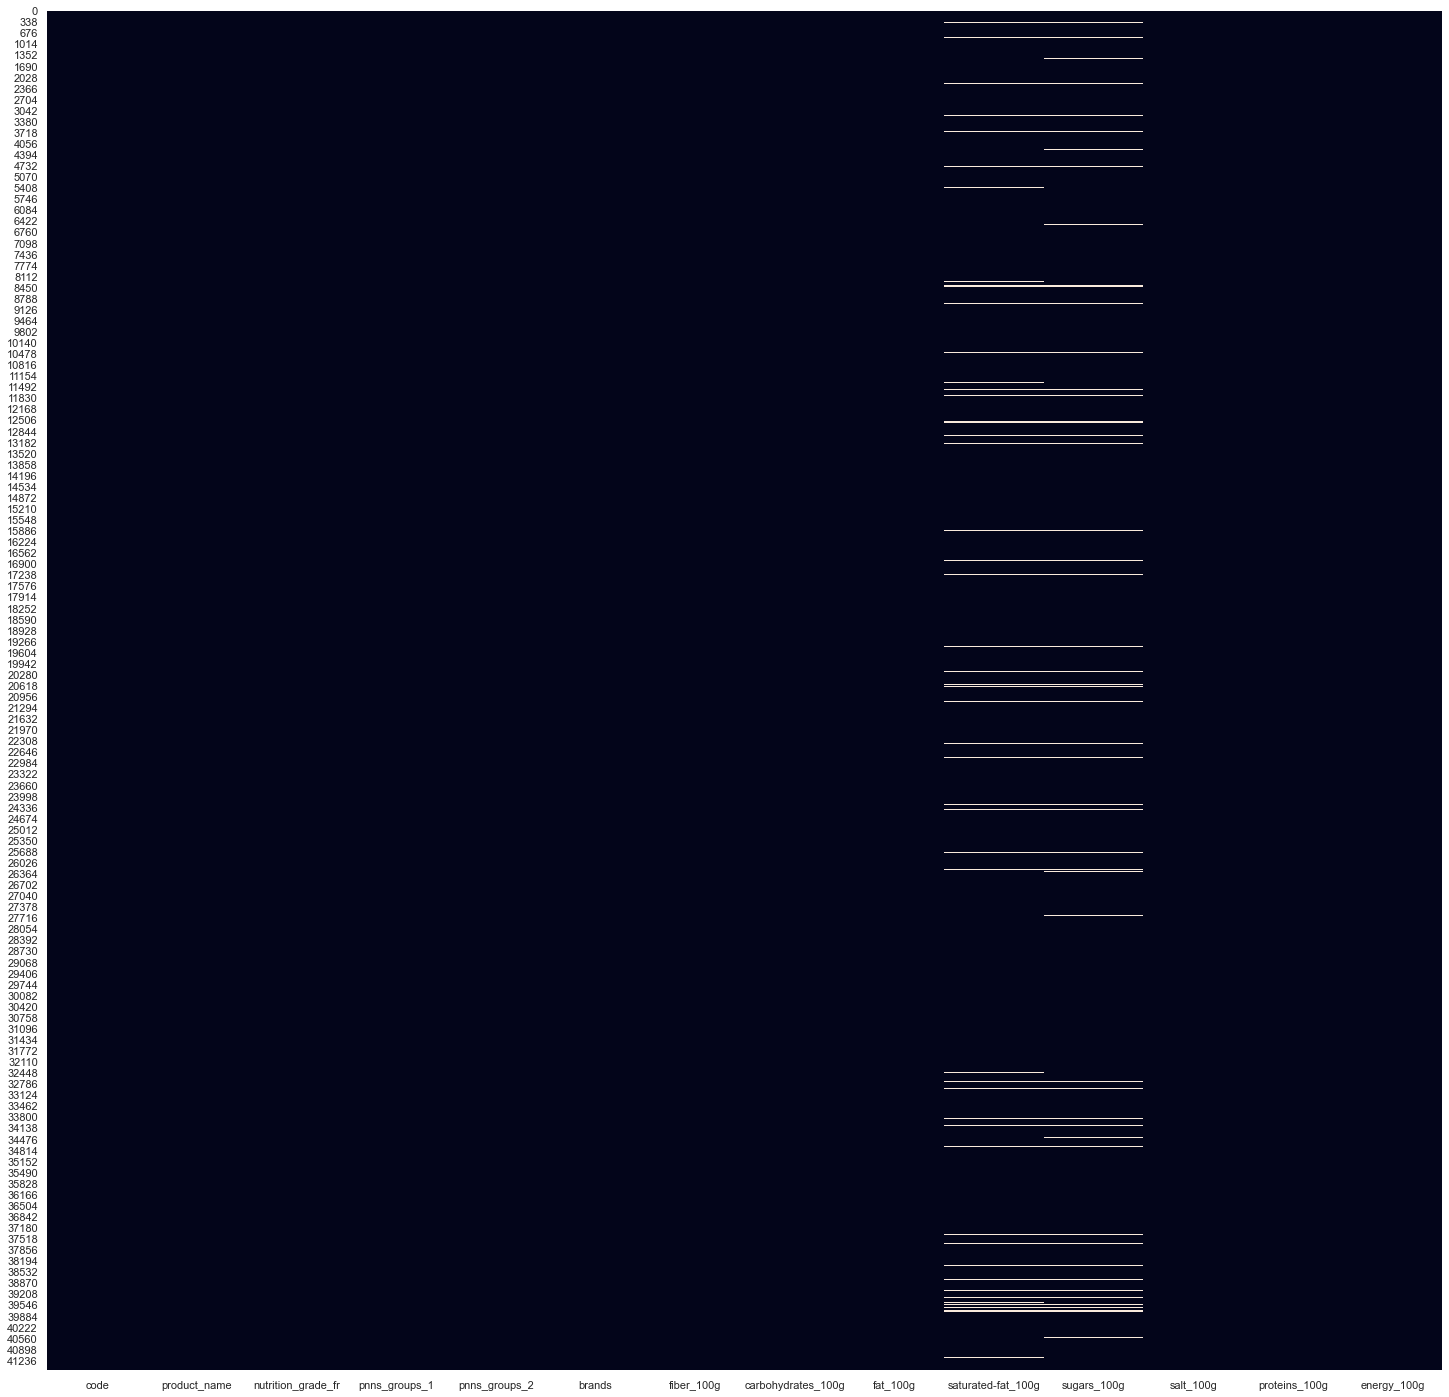

In [182]:
#On regarde une heatmap des valeurs manquantes
heatmapMissingValues(df_final)

### Remplissage par un IterativeImputer 

Il reste les variables "sugars_100g" et "saturated-fat_100g" à remplir

In [183]:
missingValues(df_final)

,Variable Name,Count,Percentage
0,sugars_100g,1450,3.49
1,saturated-fat_100g,1428,3.44
2,code,0,0.00
3,product_name,0,0.00
4,nutrition_grade_fr,0,0.00
5,pnns_groups_1,0,0.00
6,pnns_groups_2,0,0.00
7,brands,0,0.00
8,fiber_100g,0,0.00
9,carbohydrates_100g,0,0.00


In [184]:
#on sépare les valeurs catégorielles et quantitatives
df_cat = df_final.select_dtypes('object')
df_num = df_final.select_dtypes('float64')

df_cat.set_index(df_final.index)
df_num.set_index(df_final.index)

,fiber_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,energy_100g
0,0.000,10.40,0.0,0.00,10.40,0.0254,0.000,177.0
1,0.000,10.40,0.0,0.00,10.40,0.1000,0.000,177.0
2,1.500,55.00,23.0,2.50,26.00,0.6600,6.000,1900.0
3,1.800,56.00,19.0,2.50,28.00,0.6500,5.800,1768.0
4,1.500,60.00,15.0,2.00,34.00,0.6000,4.900,1670.0
...,...,...,...,...,...,...,...,...
41519,0.005,95.87,1.3,1.28,0.12,0.0050,0.040,1017.0
41520,1.470,95.31,1.3,1.28,0.10,0.0010,0.004,1031.0
41521,5.600,1.80,3.4,3.40,1.80,1.3500,7.800,2155.0
41522,5.900,74.80,2.8,0.60,2.60,0.6800,13.000,1643.0


In [185]:
#on standardise les données des variables numériques
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns = df_num.columns, index = df_num.index)
df_num_scaled

,fiber_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,energy_100g
0,-0.506511,-0.584194,-0.753998,-0.639877,-0.120499,-0.609240,-1.034857,-1.158797
1,-0.506511,-0.584194,-0.753998,-0.639877,-0.120499,-0.554675,-1.034857,-1.158797
2,-0.026317,1.063478,0.617472,-0.336782,0.735172,-0.145074,-0.223875,1.051462
3,0.069721,1.100422,0.378955,-0.336782,0.844873,-0.152389,-0.250907,0.882132
4,-0.026317,1.248195,0.140439,-0.397401,1.173977,-0.188960,-0.372555,0.756418
...,...,...,...,...,...,...,...,...
41519,-0.504910,2.573352,-0.676480,-0.484692,-0.684364,-0.624161,-1.029451,-0.081248
41520,-0.035921,2.552664,-0.676480,-0.484692,-0.685461,-0.627087,-1.034317,-0.063289
41521,1.286211,-0.901907,-0.551259,-0.227668,-0.592215,0.359613,0.019420,1.378575
41522,1.382250,1.794956,-0.587036,-0.567134,-0.548334,-0.130446,0.722272,0.721783


In [186]:
#on encode les données des variables catégorielles
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#on applique le label encoder au dataframe
df_cat_enc = df_cat.astype(str).apply(le.fit_transform)

In [187]:
df_corr = df_cat_enc.join(df_num)
df_corr

,code,product_name,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,brands,fiber_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,energy_100g
0,34790,23058,4,0,30,5671,0.000,10.40,0.0,0.00,10.40,0.0254,0.000,177.0
1,41091,1311,4,0,30,28,0.000,10.40,0.0,0.00,10.40,0.1000,0.000,177.0
2,74,18473,3,8,2,562,1.500,55.00,23.0,2.50,26.00,0.6600,6.000,1900.0
3,2647,4643,3,8,2,562,1.800,56.00,19.0,2.50,28.00,0.6500,5.800,1768.0
4,5831,4646,3,8,2,562,1.500,60.00,15.0,2.00,34.00,0.6000,4.900,1670.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41519,41509,29905,2,8,31,2313,0.005,95.87,1.3,1.28,0.12,0.0050,0.040,1017.0
41520,41510,11633,1,8,31,2313,1.470,95.31,1.3,1.28,0.10,0.0010,0.004,1031.0
41521,41514,20871,2,7,0,4581,5.600,1.80,3.4,3.40,1.80,1.3500,7.800,2155.0
41522,41516,30961,0,1,3,3834,5.900,74.80,2.8,0.60,2.60,0.6800,13.000,1643.0


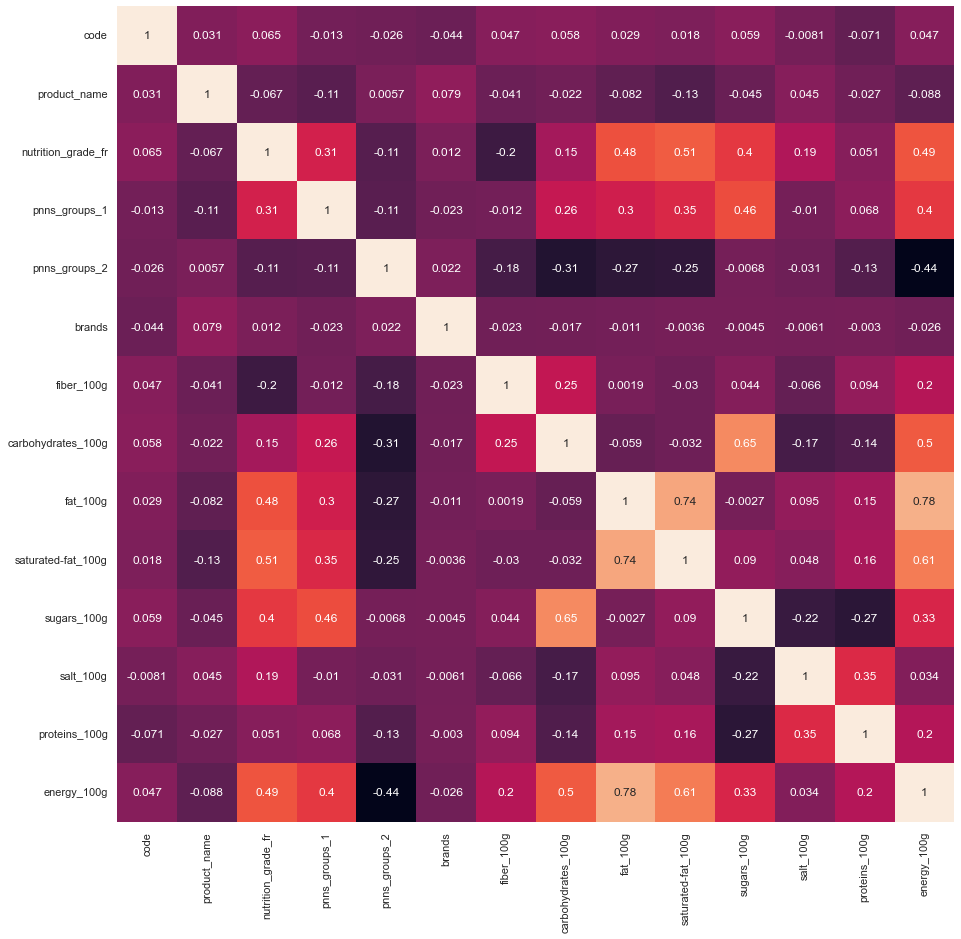

In [188]:
#on regarde la correlation des variables
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_corr.corr(), cbar=False, annot=True, ax=ax);

#On remarque bien la corrélation des variables

On va remplir les features « sugar » et « carbohydrates » avec un iterative imputer car elles ont des corrélations avec d'autres features

In [189]:
df_final[df_final['sugars_100g'].isna() & df_final['saturated-fat_100g'].isna()]

,code,product_name,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,brands,fiber_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,energy_100g
269,01633085,Fior di Napoli,c,Milk and dairy products,Cheese,Fior di Napoli,0.0,1.0,22.0,NaN,NaN,0.2032,17.0,1130.0
297,02231401630,Marpom's fraise,c,Fruits and vegetables,Fruits,Clément Faugier,0.0,42.8,0.3,NaN,NaN,0.0100,0.8,753.0
298,0227628013582,Muesli céréales et fruits secs,c,Cereals and potatoes,Breakfast cereals,Biothentic,0.0,66.2,8.1,NaN,NaN,0.4000,10.3,1683.0
310,0270190127529,Confiture d'abricots Bio,d,Sugary snacks,Sweets,Carrefour,0.0,60.0,0.3,NaN,NaN,0.0300,0.3,1036.0
315,0286892047297,Saucisson sec au jambon,d,Fish Meat Eggs,Processed meat,"Le Lyonnais,Léon Dumont",0.0,2.0,15.0,NaN,NaN,2.0000,32.0,1215.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41271,8722700430889,Mini cornichons,c,Fruits and vegetables,Vegetables,Maille,0.0,1.5,0.5,NaN,NaN,2.2000,1.0,60.0
41336,8850367900244,Lait de coco,a,Beverages,Non-sugared beverages,Chaokoh,0.0,2.0,6.0,NaN,NaN,0.0200,1.0,268.0
41361,8852634051000,Lait de coco,b,Beverages,Non-sugared beverages,CAP TROPICAL,0.0,1.0,5.0,NaN,NaN,0.0200,0.0,50.0
41395,8934563168162,Mì không chiên ăn liền Mikochi,a,Cereals and potatoes,Cereals,Vina Acecook,0.0,52.1,5.1,NaN,NaN,0.0300,8.7,292.0


#### Pour la variable "saturated-fat_100g"

In [190]:
#on va encoder les variables catégorielles car iterative imputer ne prends pas les variables catégorielles
df_corr_ii_satured_fat = df_cat_enc[['nutrition_grade_fr']].join(df_num)
#on supprime les variables non correlés qui vont fausser le calcul 
df_corr_ii_satured_fat = df_corr_ii_satured_fat.drop(['fiber_100g','proteins_100g','salt_100g','sugars_100g','carbohydrates_100g'], axis = 1)
df_corr_ii_satured_fat

,nutrition_grade_fr,fat_100g,saturated-fat_100g,energy_100g
0,4,0.0,0.00,177.0
1,4,0.0,0.00,177.0
2,3,23.0,2.50,1900.0
3,3,19.0,2.50,1768.0
4,3,15.0,2.00,1670.0
...,...,...,...,...
41519,2,1.3,1.28,1017.0
41520,1,1.3,1.28,1031.0
41521,2,3.4,3.40,2155.0
41522,0,2.8,0.60,1643.0


In [191]:
#on crée un dataframe entièrement rempli
df_final_full_ii_satured_fat = df_corr_ii_satured_fat.dropna(how = 'any', axis=0)
df_final_full_ii_satured_fat.shape

(40096, 4)

In [192]:
#On selectionne et isole une partie des données du dataframe entierement rempli 
X_test_full_ii_satured_fat = df_final_full_ii_satured_fat[::10]
X_test_full_ii_satured_fat

,nutrition_grade_fr,fat_100g,saturated-fat_100g,energy_100g
0,4,0.0,0.0,177.0
10,4,20.8,13.7,1981.0
20,0,5.3,1.9,811.0
31,3,18.1,3.7,1958.0
41,4,46.0,5.6,2444.0
...,...,...,...,...
41477,0,3.6,2.4,319.0
41488,2,18.6,9.3,1848.0
41498,2,0.0,0.0,141.0
41508,4,0.4,0.0,1075.0


In [193]:
#je vais inserer des valeurs manquantes dans la colonne sugars
X_test_full_NaN_ii_satured_fat = X_test_full_ii_satured_fat.copy()
X_test_full_NaN_ii_satured_fat.loc[X_test_full_ii_satured_fat.sample(frac=0.05).index, 'saturated-fat_100g'] = np.nan



In [194]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# On defini l'imputer 
#On va indiquer les valeurs min et max à imputer pour les variables
#on doit indiquer un array d'autant de valeurs que de variables
min_values = (0,0,0,0)
max_values = (100,100,100,3800)
imputer_ii_satured_fat = IterativeImputer(missing_values=np.nan, imputation_order='ascending',min_value=min_values,max_value=max_values)

# On entraine et transforme les données 
df_ii_imputed_satured_fat = imputer_ii_satured_fat.fit_transform(X_test_full_NaN_ii_satured_fat)

In [195]:
df_ii_imputed_satured_fat = pd.DataFrame(df_ii_imputed_satured_fat, columns = X_test_full_NaN_ii_satured_fat.columns)
df_ii_imputed_satured_fat

,nutrition_grade_fr,fat_100g,saturated-fat_100g,energy_100g
0,4.0,0.0,0.0,177.0
1,4.0,20.8,13.7,1981.0
2,0.0,5.3,1.9,811.0
3,3.0,18.1,3.7,1958.0
4,4.0,46.0,5.6,2444.0
...,...,...,...,...
4005,0.0,3.6,2.4,319.0
4006,2.0,18.6,9.3,1848.0
4007,2.0,0.0,0.0,141.0
4008,4.0,0.4,0.0,1075.0


In [196]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(df_ii_imputed_satured_fat,X_test_full_ii_satured_fat)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:",RMSE)
#le score est bon mais prends en compte des produits déjà completement rempli
#on va calculer le RMSE juste pour les produits où on a inserer des Nan pour la variable "satured fat"

Root Mean Square Error: 0.5217513324843408


In [197]:
#on va comparer le X_test_full_ii_satured_fat le set de test de base completement rempli 
#avec le test set ou les nan ont été remplies avec l'iterative imputer : df_ii_imputed_satured_fat 

df_score_satured_fat = pd.DataFrame()
X_test_full_ii_satured_fat = X_test_full_ii_satured_fat.reset_index(drop=True)
X_test_full_NaN_ii_satured_fat = X_test_full_NaN_ii_satured_fat.reset_index(drop=True)

df_score_satured_fat['saturated-fat_100g'] = X_test_full_ii_satured_fat['saturated-fat_100g']
df_score_satured_fat['saturated-fat_100g_imputed'] = df_ii_imputed_satured_fat['saturated-fat_100g']
df_score_satured_fat['saturated-fat_100g_Nan'] = X_test_full_NaN_ii_satured_fat['saturated-fat_100g']

#on rajoute une colonne à df_score pour savoir si les deux colonnes ont la même valeur ou pas
df_score_satured_fat["comparaison_valeurs"] = np.where(df_score_satured_fat['saturated-fat_100g'] == df_score_satured_fat['saturated-fat_100g_imputed'], "même valeur", "valeur différente")

#on va selectionner que les lignes pour lequel on avait ajouté des Nan
df_score_satured_fat_nan = df_score_satured_fat[df_score_satured_fat['saturated-fat_100g_Nan'].isna()]
df_score_satured_fat_nan

,saturated-fat_100g,saturated-fat_100g_imputed,saturated-fat_100g_Nan,comparaison_valeurs
40,0.000,1.917911,NaN,valeur différente
48,0.300,2.045520,NaN,valeur différente
170,11.000,12.214306,NaN,valeur différente
171,0.800,0.439455,NaN,valeur différente
182,0.800,0.656977,NaN,valeur différente
186,0.300,0.000000,NaN,valeur différente
196,3.500,3.005559,NaN,valeur différente
198,4.600,5.265062,NaN,valeur différente
202,5.600,6.275485,NaN,valeur différente
204,12.000,11.308665,NaN,valeur différente


In [198]:
df_score_satured_fat_nan_gb = df_score_satured_fat_nan.groupby("comparaison_valeurs").count().reset_index()
df_score_satured_fat_nan_gb

,comparaison_valeurs,saturated-fat_100g,saturated-fat_100g_imputed,saturated-fat_100g_Nan
0,même valeur,7,7,0
1,valeur différente,193,193,0


In [199]:
#on va calculer l'erreur pour le sucre en selectionnant que les lignes ou il y avait des Nan
list_index_nan = df_score_satured_fat_nan.index.tolist()

df_ii_imputed_nan_satured_fat = df_ii_imputed_satured_fat.iloc[list_index_nan,:][['saturated-fat_100g']]
X_test_full_ii_nan_satured_fat = X_test_full_ii_satured_fat.iloc[list_index_nan,:][['saturated-fat_100g']]

MSE = mean_squared_error(df_ii_imputed_nan_satured_fat,X_test_full_ii_nan_satured_fat)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:",RMSE)

Root Mean Square Error: 4.672515503080182


Le score est pas bon donc on ne va pas utiliser l'algorithme pour remplir les valeurs manquantes mais on décide de supprimer la variable satured fat qui ne nous apporte pas plus d'information que fat 

In [200]:
df_final.isna().sum()

code                     0
product_name             0
nutrition_grade_fr       0
pnns_groups_1            0
pnns_groups_2            0
brands                   0
fiber_100g               0
carbohydrates_100g       0
fat_100g                 0
saturated-fat_100g    1428
sugars_100g           1450
salt_100g                0
proteins_100g            0
energy_100g              0
dtype: int64

In [201]:
#on regarde les valeurs manquantes de la variable 
df_final[df_final['saturated-fat_100g'].isna()]

,code,product_name,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,brands,fiber_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,energy_100g
27,13935620236,Boisson au soja,e,Beverages,Sweetened beverages,Amofood,0.0,10.2,0.8,NaN,8.2,0.08636,2.0,235.2
172,72252227870,Old English Hunt Orange Marmalade,d,Sugary snacks,Sweets,Fortnum & Mason,0.0,65.0,0.1,NaN,65.0,0.03000,0.8,1125.0
269,01633085,Fior di Napoli,c,Milk and dairy products,Cheese,Fior di Napoli,0.0,1.0,22.0,NaN,NaN,0.20320,17.0,1130.0
297,02231401630,Marpom's fraise,c,Fruits and vegetables,Fruits,Clément Faugier,0.0,42.8,0.3,NaN,NaN,0.01000,0.8,753.0
298,0227628013582,Muesli céréales et fruits secs,c,Cereals and potatoes,Breakfast cereals,Biothentic,0.0,66.2,8.1,NaN,NaN,0.40000,10.3,1683.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41336,8850367900244,Lait de coco,a,Beverages,Non-sugared beverages,Chaokoh,0.0,2.0,6.0,NaN,NaN,0.02000,1.0,268.0
41361,8852634051000,Lait de coco,b,Beverages,Non-sugared beverages,CAP TROPICAL,0.0,1.0,5.0,NaN,NaN,0.02000,0.0,50.0
41390,8888209180011,Oyster Sauce,d,Fat and sauces,Dressings and sauces,Ong's,0.0,26.9,0.1,NaN,19.0,9.20000,2.6,490.0
41395,8934563168162,Mì không chiên ăn liền Mikochi,a,Cereals and potatoes,Cereals,Vina Acecook,0.0,52.1,5.1,NaN,NaN,0.03000,8.7,292.0


In [202]:
df_final = df_final.drop(['saturated-fat_100g'], axis = 1)
df_final

,code,product_name,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,brands,fiber_100g,carbohydrates_100g,fat_100g,sugars_100g,salt_100g,proteins_100g,energy_100g
0,40608754,"Pepsi, Nouveau goût !",e,Beverages,Sweetened beverages,Pepsi,0.000,10.40,0.0,10.40,0.0254,0.000,177.0
1,87177756,7Up,e,Beverages,Sweetened beverages,"7Up,Pepsico",0.000,10.40,0.0,10.40,0.1000,0.000,177.0
2,10,Madeleines nature,d,Sugary snacks,Biscuits and cakes,Bijou,1.500,55.00,23.0,26.00,0.6600,6.000,1900.0
3,30,Cakes Raisins,d,Sugary snacks,Biscuits and cakes,Bijou,1.800,56.00,19.0,28.00,0.6500,5.800,1768.0
4,31,Cakes aux Fruits,d,Sugary snacks,Biscuits and cakes,Bijou,1.500,60.00,15.0,34.00,0.6000,4.900,1670.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41519,96068779,Spearmint sans sucres,c,Sugary snacks,Sweets,Fisherman's Friend,0.005,95.87,1.3,0.12,0.0050,0.040,1017.0
41520,96118580,Fisherman's Friend Miel-Citron,b,Sugary snacks,Sweets,Fisherman's Friend,1.470,95.31,1.3,0.10,0.0010,0.004,1031.0
41521,9778564312457,Nature cheddar and red onion crisps,c,Salty snacks,Appetizers,Marks and Spencer,5.600,1.80,3.4,1.80,1.3500,7.800,2155.0
41522,9847548283004,Tartines craquantes bio au sarrasin,a,Cereals and potatoes,Bread,Le Pain des fleurs,5.900,74.80,2.8,2.60,0.6800,13.000,1643.0


#### Pour la variable "sugars_100g"

In [203]:
#on va encoder les variables catégorielles car iterative imputer ne prends pas les variables catégorielles
df_corr_ii_sugars = df_cat_enc[['nutrition_grade_fr']].join(df_num)
#on supprime les variables non correlés qui vont fausser le calcul 
df_corr_ii_sugars = df_corr_ii_sugars.drop(['fiber_100g','proteins_100g','salt_100g','fat_100g','saturated-fat_100g'], axis = 1)
df_corr_ii_sugars

,nutrition_grade_fr,carbohydrates_100g,sugars_100g,energy_100g
0,4,10.40,10.40,177.0
1,4,10.40,10.40,177.0
2,3,55.00,26.00,1900.0
3,3,56.00,28.00,1768.0
4,3,60.00,34.00,1670.0
...,...,...,...,...
41519,2,95.87,0.12,1017.0
41520,1,95.31,0.10,1031.0
41521,2,1.80,1.80,2155.0
41522,0,74.80,2.60,1643.0


In [204]:
#on crée un dataframe entièrement rempli
df_final_full_ii_sugars = df_corr_ii_sugars.dropna(how = 'any', axis=0)
df_final_full_ii_sugars.shape

(40074, 4)

In [205]:
#On selectionne et isole une partie des données du dataframe entierement rempli 
X_test_full_ii_sugars = df_final_full_ii_sugars[::10]
X_test_full_ii_sugars

,nutrition_grade_fr,carbohydrates_100g,sugars_100g,energy_100g
0,4,10.40,10.4,177.0
10,4,63.60,31.8,1981.0
20,0,25.10,1.3,811.0
30,4,70.80,40.8,1916.0
40,3,17.40,7.8,2444.0
...,...,...,...,...
41479,4,65.00,46.4,1730.0
41490,2,49.40,8.2,1806.0
41500,3,24.30,15.6,446.0
41510,3,7.00,7.0,119.0


In [206]:
#je vais inserer des valeurs manquantes dans la colonne sugars
X_test_full_NaN_ii_sugars = X_test_full_ii_sugars.copy()
X_test_full_NaN_ii_sugars.loc[X_test_full_ii_sugars.sample(frac=0.05).index, 'sugars_100g'] = np.nan

In [207]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# On defini l'imputer 
#On va indiquer les valeurs min et max à imputer pour les variables
#on doit indiquer un array d'autant de valeurs que de variables
min_values = (0,0,0,0)
max_values = (100,100,100,3800)
imputer_ii_sugars = IterativeImputer(missing_values=np.nan, imputation_order='ascending',min_value=min_values,max_value=max_values)

# On entraine et transforme les données 
df_ii_imputed_sugars = imputer_ii_sugars.fit_transform(X_test_full_NaN_ii_sugars)

In [208]:
df_ii_imputed_sugars = pd.DataFrame(df_ii_imputed_sugars, columns = X_test_full_NaN_ii_sugars.columns)
df_ii_imputed_sugars

,nutrition_grade_fr,carbohydrates_100g,sugars_100g,energy_100g
0,4.0,10.40,10.4,177.0
1,4.0,63.60,31.8,1981.0
2,0.0,25.10,1.3,811.0
3,4.0,70.80,40.8,1916.0
4,3.0,17.40,7.8,2444.0
...,...,...,...,...
4003,4.0,65.00,46.4,1730.0
4004,2.0,49.40,8.2,1806.0
4005,3.0,24.30,15.6,446.0
4006,3.0,7.00,7.0,119.0


In [209]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(df_ii_imputed_sugars,X_test_full_ii_sugars)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:",RMSE)

Root Mean Square Error: 1.3390001831635008


In [210]:
#on va comparer le X_test_full_ii_sugars le set de test de base completement rempli 
#avec le test set ou les nan ont été remplies avec l'iterative imputer : df_ii_imputed_sugars 

df_score_sugars = pd.DataFrame()
X_test_full_ii_sugars = X_test_full_ii_sugars.reset_index(drop=True)
X_test_full_NaN_ii_sugars = X_test_full_NaN_ii_sugars.reset_index(drop=True)

df_score_sugars['sugars_100g'] = X_test_full_ii_sugars['sugars_100g']
df_score_sugars['sugars_100g_imputed'] = df_ii_imputed_sugars['sugars_100g']
df_score_sugars['sugars_100g_Nan'] = X_test_full_NaN_ii_sugars['sugars_100g']

#on rajoute une colonne à df_score pour savoir si les deux colonnes ont la même valeur ou pas
df_score_sugars["comparaison_valeurs"] = np.where(df_score_sugars['sugars_100g'] == df_score_sugars['sugars_100g_imputed'], "même valeur", "valeur différente")

#on va selectionner que les lignes pour lequel on avait ajouté des Nan
df_score_sugars_nan = df_score_sugars[df_score_sugars['sugars_100g_Nan'].isna()]
df_score_sugars_nan

,sugars_100g,sugars_100g_imputed,sugars_100g_Nan,comparaison_valeurs
43,0.00,0.000000,NaN,même valeur
44,29.50,31.997122,NaN,valeur différente
45,5.50,12.365428,NaN,valeur différente
70,61.00,48.637267,NaN,valeur différente
84,2.60,24.734670,NaN,valeur différente
109,29.00,30.270689,NaN,valeur différente
126,0.00,0.000000,NaN,même valeur
140,4.00,7.728873,NaN,valeur différente
178,4.20,0.000000,NaN,valeur différente
196,3.30,5.342754,NaN,valeur différente


In [211]:
df_score_sugars_nan_gb = df_score_sugars_nan.groupby("comparaison_valeurs").count().reset_index()
df_score_sugars_nan_gb

,comparaison_valeurs,sugars_100g,sugars_100g_imputed,sugars_100g_Nan
0,même valeur,9,9,0
1,valeur différente,191,191,0


In [212]:
#on va calculer l'erreur pour le sucre en selectionnant que les lignes ou il y avait des Nan
list_index_nan = df_score_sugars_nan.index.tolist()

df_ii_imputed_nan_sugars = df_ii_imputed_sugars.iloc[list_index_nan,:][['sugars_100g']]
X_test_full_ii_nan_sugars = X_test_full_ii_sugars.iloc[list_index_nan,:][['sugars_100g']]

MSE = mean_squared_error(df_ii_imputed_nan_sugars,X_test_full_ii_nan_sugars)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:",RMSE)

Root Mean Square Error: 11.988352125268634


Le score est pas bon, on décide de supprimer la variable sugars car elle ne nous apport pas plus d'information que carbohydrates

In [213]:
#on regarde les valeurs manquantes de la variable 
df_final[df_final['sugars_100g'].isna()]

,code,product_name,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,brands,fiber_100g,carbohydrates_100g,fat_100g,sugars_100g,salt_100g,proteins_100g,energy_100g
44,14816001007,Vinaigre basalmique bio,d,Fat and sauces,Dressings and sauces,Bioitalia,0.0,27.20,0.0,NaN,1.65677,0.70,444.9
269,01633085,Fior di Napoli,c,Milk and dairy products,Cheese,Fior di Napoli,0.0,1.00,22.0,NaN,0.20320,17.00,1130.0
297,02231401630,Marpom's fraise,c,Fruits and vegetables,Fruits,Clément Faugier,0.0,42.80,0.3,NaN,0.01000,0.80,753.0
298,0227628013582,Muesli céréales et fruits secs,c,Cereals and potatoes,Breakfast cereals,Biothentic,0.0,66.20,8.1,NaN,0.40000,10.30,1683.0
310,0270190127529,Confiture d'abricots Bio,d,Sugary snacks,Sweets,Carrefour,0.0,60.00,0.3,NaN,0.03000,0.30,1036.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41336,8850367900244,Lait de coco,a,Beverages,Non-sugared beverages,Chaokoh,0.0,2.00,6.0,NaN,0.02000,1.00,268.0
41343,8850620888012,Sauce poisson (NUOC MAN),c,Fat and sauces,Dressings and sauces,Squid,0.0,2.94,0.0,NaN,1.65677,9.47,211.0
41361,8852634051000,Lait de coco,b,Beverages,Non-sugared beverages,CAP TROPICAL,0.0,1.00,5.0,NaN,0.02000,0.00,50.0
41395,8934563168162,Mì không chiên ăn liền Mikochi,a,Cereals and potatoes,Cereals,Vina Acecook,0.0,52.10,5.1,NaN,0.03000,8.70,292.0


In [214]:
df_final = df_final.drop(['sugars_100g'], axis = 1)
df_final

,code,product_name,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,brands,fiber_100g,carbohydrates_100g,fat_100g,salt_100g,proteins_100g,energy_100g
0,40608754,"Pepsi, Nouveau goût !",e,Beverages,Sweetened beverages,Pepsi,0.000,10.40,0.0,0.0254,0.000,177.0
1,87177756,7Up,e,Beverages,Sweetened beverages,"7Up,Pepsico",0.000,10.40,0.0,0.1000,0.000,177.0
2,10,Madeleines nature,d,Sugary snacks,Biscuits and cakes,Bijou,1.500,55.00,23.0,0.6600,6.000,1900.0
3,30,Cakes Raisins,d,Sugary snacks,Biscuits and cakes,Bijou,1.800,56.00,19.0,0.6500,5.800,1768.0
4,31,Cakes aux Fruits,d,Sugary snacks,Biscuits and cakes,Bijou,1.500,60.00,15.0,0.6000,4.900,1670.0
...,...,...,...,...,...,...,...,...,...,...,...,...
41519,96068779,Spearmint sans sucres,c,Sugary snacks,Sweets,Fisherman's Friend,0.005,95.87,1.3,0.0050,0.040,1017.0
41520,96118580,Fisherman's Friend Miel-Citron,b,Sugary snacks,Sweets,Fisherman's Friend,1.470,95.31,1.3,0.0010,0.004,1031.0
41521,9778564312457,Nature cheddar and red onion crisps,c,Salty snacks,Appetizers,Marks and Spencer,5.600,1.80,3.4,1.3500,7.800,2155.0
41522,9847548283004,Tartines craquantes bio au sarrasin,a,Cereals and potatoes,Bread,Le Pain des fleurs,5.900,74.80,2.8,0.6800,13.000,1643.0


In [215]:
df_final.head()

,code,product_name,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,brands,fiber_100g,carbohydrates_100g,fat_100g,salt_100g,proteins_100g,energy_100g
0,40608754,"Pepsi, Nouveau goût !",e,Beverages,Sweetened beverages,Pepsi,0.0,10.4,0.0,0.0254,0.0,177.0
1,87177756,7Up,e,Beverages,Sweetened beverages,"7Up,Pepsico",0.0,10.4,0.0,0.1000,0.0,177.0
2,10,Madeleines nature,d,Sugary snacks,Biscuits and cakes,Bijou,1.5,55.0,23.0,0.6600,6.0,1900.0
3,30,Cakes Raisins,d,Sugary snacks,Biscuits and cakes,Bijou,1.8,56.0,19.0,0.6500,5.8,1768.0
4,31,Cakes aux Fruits,d,Sugary snacks,Biscuits and cakes,Bijou,1.5,60.0,15.0,0.6000,4.9,1670.0


In [216]:
#on vérifie qu'on a plus de valeurs manquantes 
missingValues(df_final)

,Variable Name,Count,Percentage
0,code,0,0.0
1,product_name,0,0.0
2,nutrition_grade_fr,0,0.0
3,pnns_groups_1,0,0.0
4,pnns_groups_2,0,0.0
5,brands,0,0.0
6,fiber_100g,0,0.0
7,carbohydrates_100g,0,0.0
8,fat_100g,0,0.0
9,salt_100g,0,0.0


On enregistre le dataframe final pour pouvoir poursuivre l'étude sur l'analyse exploratoire

In [217]:
#enregistrer df_final 
df_final.to_csv("df_final.csv")